In [ ]:
# Core1 RFM + Churn Analysis

In [ ]:
# Core2 Perform Market Basket Analysis

In [ ]:
# Core3 Sentiment Analysis

In [ ]:
# Extra 01 Bert Model

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import squarify
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
!pip install nltk

In [4]:
!pip install --index-url https://test.pypi.org/simple/ PyARMViz

Looking in indexes: https://test.pypi.org/simple/


In [5]:
!pip install spacy

In [7]:
from sklearn.metrics import silhouette_score

In [ ]:
# Contain only Reviews dataframe

In [ ]:
dfRev = pd.read_csv('dfRev_uniques.csv')

In [8]:
df = pd.read_csv('dataframe.csv')

In [9]:
# Drop rows where direction = -1
df = df[df['direction'] != -1].copy()

In [577]:
df.head() #.drop('Unnamed: 0',axis = 1, inplace = True)

address_id  postal_code district          region  customer_id   birthdate  \
0        6962        29121       PC  EMILIA ROMAGNA         7821  1984-10-03   
1      228406        24022       BG       LOMBARDIA       246969  1978-12-27   
2      278496          125       RM           LAZIO       298715  1977-04-29   
3      278496          125       RM           LAZIO       298715  1977-04-29   
4      385332         6059       PG          UMBRIA       406505  1976-04-26   

  gender job_type               email_provider  flag_phone_provided  ...  \
0      M        0                    gmail.com                  1.0  ...   
1      F        0  personal_mail_provider_7382                  1.0  ...   
2      F        0                    gmail.com                  0.0  ...   
3      F        0                    gmail.com                  0.0  ...   
4      F        0                    gmail.com                  1.0  ...   

   loyatlty_status  activation_date                          order_id  \
0                1       2022-04-06  cff01b663e65a4a426add3d3591dd113   
1                1       2022-03-13  8f7735a267cccb1e922a38d31b8f4b0b   
2                1       2022-04-08  8025322b509df76b6684eca2d262fde7   
3                1       2022-04-08  61b4e60e8f1503508a0f739e43b49df1   
4                1       2022-06-02  de7f5649c28e00f03cace55339474a35   

   store_id product_id  direction gross_price price_reduction  \
0        11   33700716          1         0.2            0.00   
1        40   33700716          1         0.2            0.00   
2        39   33700716          1         0.2            0.02   
3        39   33700716          1         0.2            0.00   
4         9   33700716          1         0.2            0.00   

     purchase_datetime  product_class  
0  2022-08-23 13:13:03             10  
1  2022-07-21 11:50:07             10  
2  2022-06-03 09:22:35             10  
3  2023-03-28 12:30:35             10  
4  2022-08-04 18:25:49             10  

[5 rows x 25 columns]

In [578]:
df.shape, df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 0 to 430
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address_id           427 non-null    int64  
 1   postal_code          427 non-null    int64  
 2   district             427 non-null    object 
 3   region               427 non-null    object 
 4   customer_id          427 non-null    int64  
 5   birthdate            427 non-null    object 
 6   gender               427 non-null    object 
 7   job_type             427 non-null    object 
 8   email_provider       427 non-null    object 
 9   flag_phone_provided  427 non-null    float64
 10  flag_privacy         427 non-null    bool   
 11  customer_age         427 non-null    float64
 12  account_id           427 non-null    int64  
 13  favorite_store       427 non-null    int64  
 14  loyalty_type         427 non-null    object 
 15  loyatlty_status      427 non-null    int

((427, 25),
 Index(['address_id', 'postal_code', 'district', 'region', 'customer_id',
        'birthdate', 'gender', 'job_type', 'email_provider',
        'flag_phone_provided', 'flag_privacy', 'customer_age', 'account_id',
        'favorite_store', 'loyalty_type', 'loyatlty_status', 'activation_date',
        'order_id', 'store_id', 'product_id', 'direction', 'gross_price',
        'price_reduction', 'purchase_datetime', 'product_class'],
       dtype='object'),
 None)

In [472]:
df.describe()

address_id   postal_code    customer_id  flag_phone_provided  \
count     427.000000    427.000000     427.000000           427.000000   
mean   348934.992974  25769.519906  325885.899297             0.854801   
std    210228.062845  24208.444757  229404.893656             0.352715   
min      6962.000000     20.000000     658.000000             0.000000   
25%    211837.000000   6084.000000  103268.500000             1.000000   
50%    287938.000000  20093.000000  304480.000000             1.000000   
75%    453801.000000  36015.000000  474890.000000             1.000000   
max    899892.000000  90128.000000  934716.000000             1.000000   

       customer_age     account_id  favorite_store  loyatlty_status  \
count    427.000000     427.000000      427.000000            427.0   
mean      47.194379  355304.819672       25.332553              1.0   
std        9.539499  195117.977701       16.324524              0.0   
min       32.000000   44903.000000        1.000000              1.0   
25%       41.000000  211463.000000        9.000000              1.0   
50%       46.000000  332900.000000       33.000000              1.0   
75%       51.000000  511209.000000       36.000000              1.0   
max       71.000000  927938.000000       49.000000              1.0   

         store_id    product_id  direction  gross_price  price_reduction  \
count  427.000000  4.270000e+02      427.0   427.000000       427.000000   
mean    26.896956  3.608378e+07        1.0    27.378993         2.165972   
std     16.085122  7.470249e+06        0.0    89.528594        11.195325   
min      2.000000  3.006245e+07        1.0     0.200000         0.000000   
25%     10.000000  3.380509e+07        1.0     1.990000         0.000000   
50%     33.000000  3.515612e+07        1.0     5.380000         0.000000   
75%     39.000000  3.610707e+07        1.0    19.675000         0.095000   
max     49.000000  8.204297e+07        1.0  1389.660000       156.000000   

       product_class  
count     427.000000  
mean        7.484778  
std         3.726775  
min         1.000000  
25%         3.000000  
50%         7.000000  
75%        11.000000  
max        14.000000

In [473]:
df.isna().sum()

address_id             0
postal_code            0
district               0
region                 0
customer_id            0
birthdate              0
gender                 0
job_type               0
email_provider         0
flag_phone_provided    0
flag_privacy           0
customer_age           0
account_id             0
favorite_store         0
loyalty_type           0
loyatlty_status        0
activation_date        0
order_id               0
store_id               0
product_id             0
direction              0
gross_price            0
price_reduction        0
purchase_datetime      0
product_class          0
dtype: int64

In [ ]:
#### EDA

In [ ]:
# Distribution of Customers in different Regions

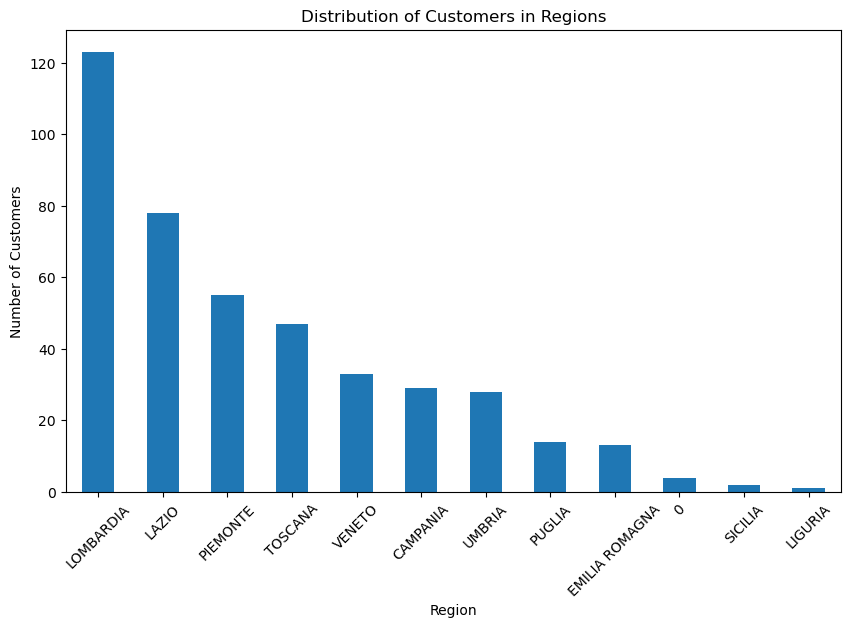

In [474]:
import matplotlib.pyplot as plt

# Count the number of customers in each region
region_counts = df['region'].value_counts()

# Plot the distribution of customers in regions
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers in Regions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# What is the distribution of customers based on their job types?

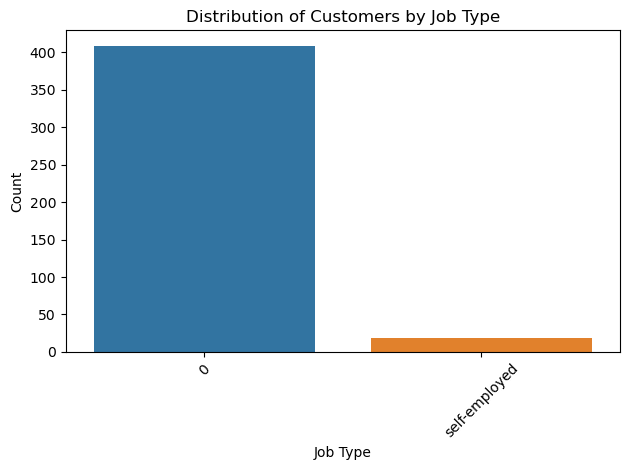

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(x='job_type', data=df)

# Customize the plot if needed
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Distribution of Customers by Job Type')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Which email providers are most commonly used by the customers?

In [371]:
# Calculate the frequency of each email provider
email_provider_counts = df['email_provider'].value_counts()

# Print the top 5 most commonly used email providers
top_email_providers = email_provider_counts.head(5)
print("Most commonly used email providers:")
print(top_email_providers)


Most commonly used email providers:
gmail.com                      225
hotmail.it                      71
hotmail.com                     35
libero.it                       33
personal_mail_provider_6056     17
Name: email_provider, dtype: int64


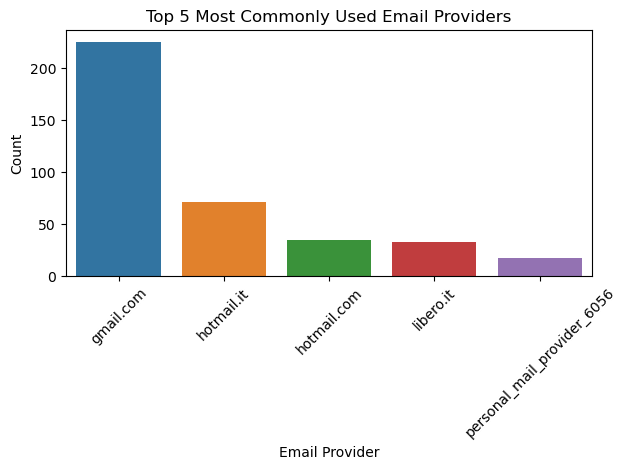

In [372]:
# Calculate the frequency of each email provider
email_provider_counts = df['email_provider'].value_counts()

# Select the top 5 most commonly used email providers
top_email_providers = email_provider_counts.head(5)

# Create the bar plot
sns.barplot(x=top_email_providers.index, y=top_email_providers.values)

# Customize the plot if needed
plt.xlabel('Email Provider')
plt.ylabel('Count')
plt.title('Top 5 Most Commonly Used Email Providers')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# How many customers have provided their phone numbers

In [373]:

# Count the number of customers who have provided their phone numbers
num_customers_with_phone = df[df['flag_phone_provided'] == 1].shape[0]

# Print the result
print("Number of customers who have provided their phone numbers:", num_customers_with_phone)


Number of customers who have provided their phone numbers: 365


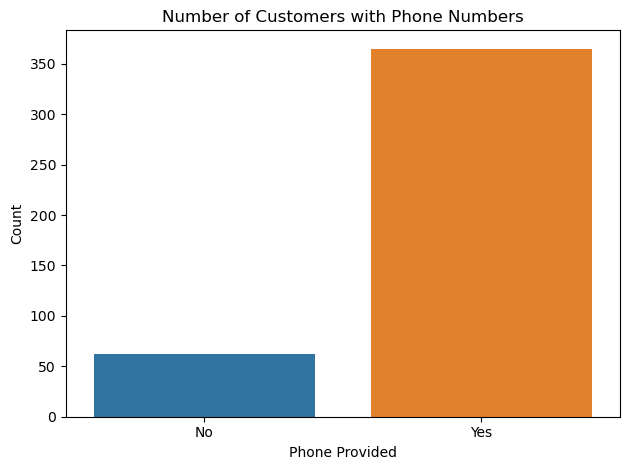

In [374]:

# Create the countplot
sns.countplot(x='flag_phone_provided', data=df)

# Customize the plot if needed
plt.xlabel('Phone Provided')
plt.ylabel('Count')
plt.title('Number of Customers with Phone Numbers')
plt.xticks([0, 1], ['No', 'Yes'])

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# What is the average age of the customers?

Average Age of Customers: 47.1943793911007


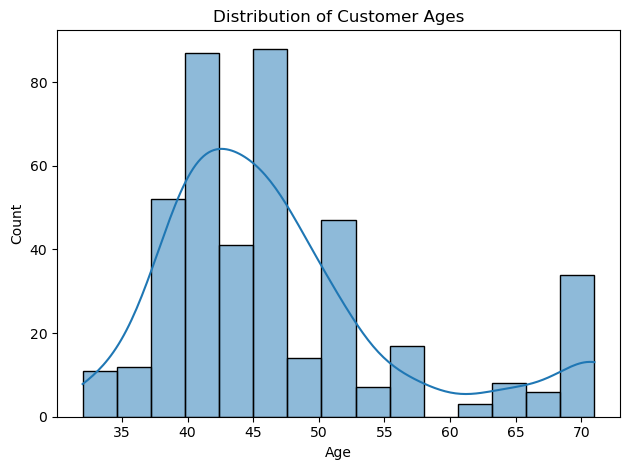

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average age
average_age = df['customer_age'].mean()

# Print the average age
print("Average Age of Customers:", average_age)

# Create a histogram plot of customer ages
sns.histplot(data=df, x='customer_age', kde=True)

# Customize the plot if needed
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# How many customers have opted for privacy settings?

Number of customers who have opted for privacy settings: 412


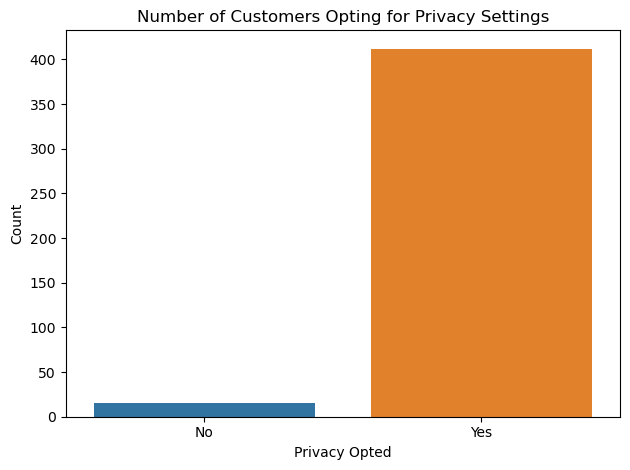

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains a column named 'flag_privacy' indicating if customers have opted for privacy settings

# Count the number of customers who have opted for privacy settings
num_customers_with_privacy = df[df['flag_privacy'] == 1].shape[0]

# Print the result
print("Number of customers who have opted for privacy settings:", num_customers_with_privacy)

# Create the countplot
sns.countplot(x='flag_privacy', data=df)

# Customize the plot if needed
plt.xlabel('Privacy Opted')
plt.ylabel('Count')
plt.title('Number of Customers Opting for Privacy Settings')
plt.xticks([0, 1], ['No', 'Yes'])

# Display the plot
plt.tight_layout()
plt.show()


In [377]:
#What is the distribution of customer genders?

Gender Distribution:
F    245
M    182
Name: gender, dtype: int64


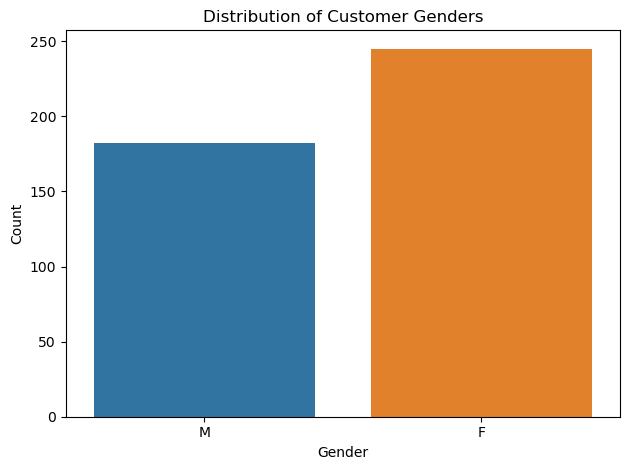

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains a column named 'gender' representing the gender of customers

# Calculate the count of each gender category
gender_counts = df['gender'].value_counts()

# Print the gender distribution
print("Gender Distribution:")
print(gender_counts)

# Create a bar plot of gender distribution
sns.countplot(x='gender', data=df)

# Customize the plot if needed
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Customer Genders')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# How many customers are enrolled in the loyalty program, and what are their loyalty types?

Loyalty Type Distribution:
standard             230
premium              175
business standard     16
business premium       6
Name: loyalty_type, dtype: int64


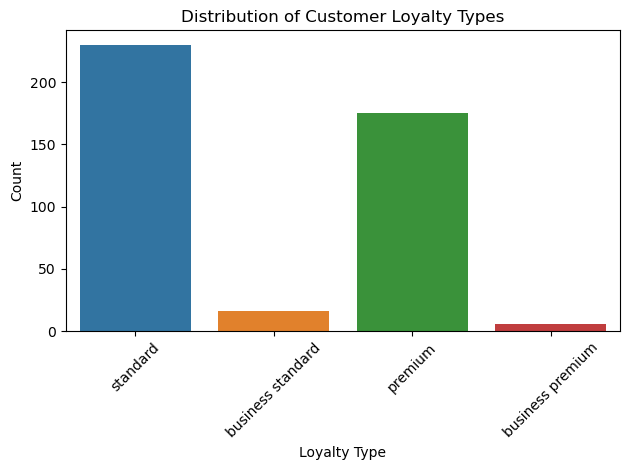

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains a column named 'loyalty_type' indicating the loyalty types of customers

# Count the number of customers enrolled in the loyalty program
loyalty_counts = df['loyalty_type'].value_counts()

# Print the loyalty type distribution
print("Loyalty Type Distribution:")
print(loyalty_counts)

# Create a bar plot of loyalty type distribution
sns.countplot(x='loyalty_type', data=df)

# Customize the plot if needed
plt.xlabel('Loyalty Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Loyalty Types')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# What is the distribution of customer loyalty statuses?

Loyalty Status Distribution:
1    427
Name: loyatlty_status, dtype: int64


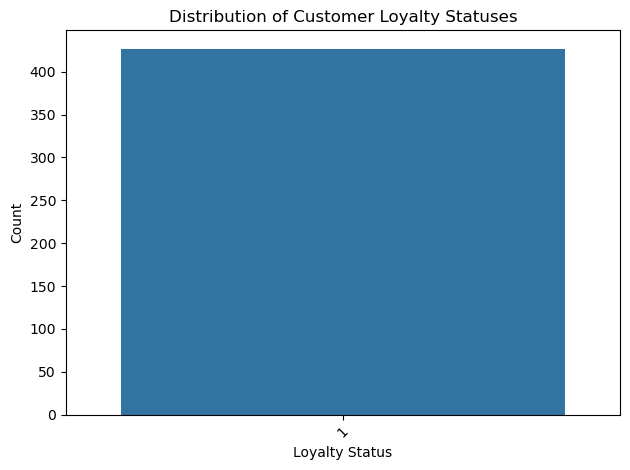

In [380]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count of each loyalty status category
loyalty_status_counts = df['loyatlty_status'].value_counts()

# Print the loyalty status distribution
print("Loyalty Status Distribution:")
print(loyalty_status_counts)

# Create a bar plot of loyalty status distribution
sns.countplot(x='loyatlty_status', data=df)

# Customize the plot if needed
plt.xlabel('Loyalty Status')
plt.ylabel('Count')
plt.title('Distribution of Customer Loyalty Statuses')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# What is the average customer age segmented by their favorite store?

Average Customer Age by Favorite Store:
favorite_store
1     53.615385
2     39.000000
3     40.583333
5     43.000000
6     47.000000
9     45.928571
11    38.000000
12    44.000000
13    32.000000
14    42.000000
15    48.250000
17    43.000000
19    40.000000
20    55.000000
21    40.000000
22    39.500000
24    33.000000
26    41.000000
29    42.000000
30    64.000000
31    40.142857
32    46.000000
33    46.521739
34    41.000000
35    40.000000
36    60.507246
37    46.666667
38    41.714286
39    45.866667
42    41.000000
43    37.000000
44    41.857143
46    47.000000
47    48.333333
48    53.000000
49    40.000000
Name: customer_age, dtype: float64


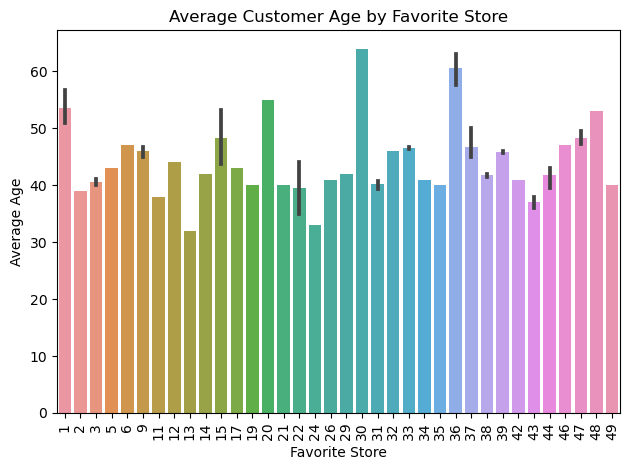

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains columns named 'customer_age' and 'favorite_store'

# Calculate the average customer age segmented by favorite store
avg_age_by_store = df.groupby('favorite_store')['customer_age'].mean()

# Print the average customer age by store
print("Average Customer Age by Favorite Store:")
print(avg_age_by_store)

# Create a bar plot of average customer age by store
sns.barplot(x='favorite_store', y='customer_age', data=df)

# Customize the plot if needed
plt.xlabel('Favorite Store')
plt.ylabel('Average Age')
plt.title('Average Customer Age by Favorite Store')
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# How does customer sentiment vary across different labeled reviews?

In [382]:
dfRev.head() #.drop('Unnamed: 0', axis =1, inplace = True)

review_text sentiment_label  \
0  best coffee from green mountain so far i recom...        positive   
1  My vet told me to have my dog get these to hel...        positive   
2  i have not gotten my order or heard anything f...        negative   
3  No bitter aftertaste no stomach burning after ...        positive   
4  I have purchase this coffee several times my h...        positive   

   review_id  customer_id                                 text_data_cleaning  
0      16434         7821  [good, coffee, green, mountain, far, recomend,...  
1      21485       246969                [vet, tell, dog, help, tooth, love]  
2     104035       298715              [order, hear, seller, send, 2, email]  
3     115260       406505  [bitter, aftertaste, stomach, burn, drink, gre...  
4       9418       693062  [purchase, coffee, time, husband, great, taste...

Sentiment Label Distribution:
positive    44
neutral      9
negative     4
Name: sentiment_label, dtype: int64


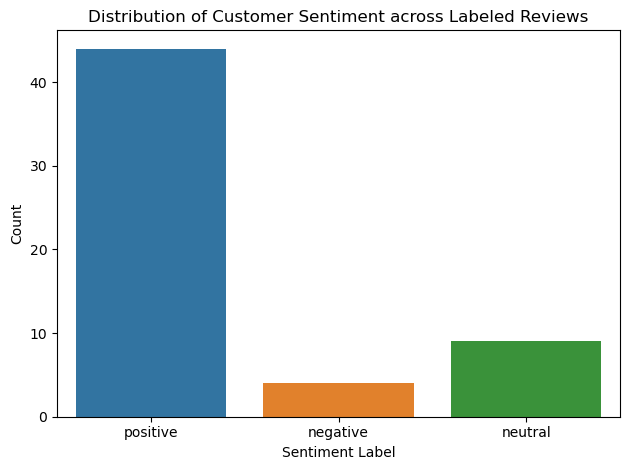

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count of each sentiment label category
sentiment_counts = dfRev['sentiment_label'].value_counts()

# Print the sentiment label distribution
print("Sentiment Label Distribution:")
print(sentiment_counts)

# Create a bar plot of sentiment label distribution
sns.countplot(x='sentiment_label', data=dfRev)

# Customize the plot if needed
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Customer Sentiment across Labeled Reviews')

# Display the plot
plt.tight_layout()
plt.show()


Top Products by Number of Reviews:
33700716    33
33817091    13
48020504     5
34947934     3
32078802     3
32079082     3
35984452     3
32882024     3
35947702     3
35903301     3
Name: product_id, dtype: int64


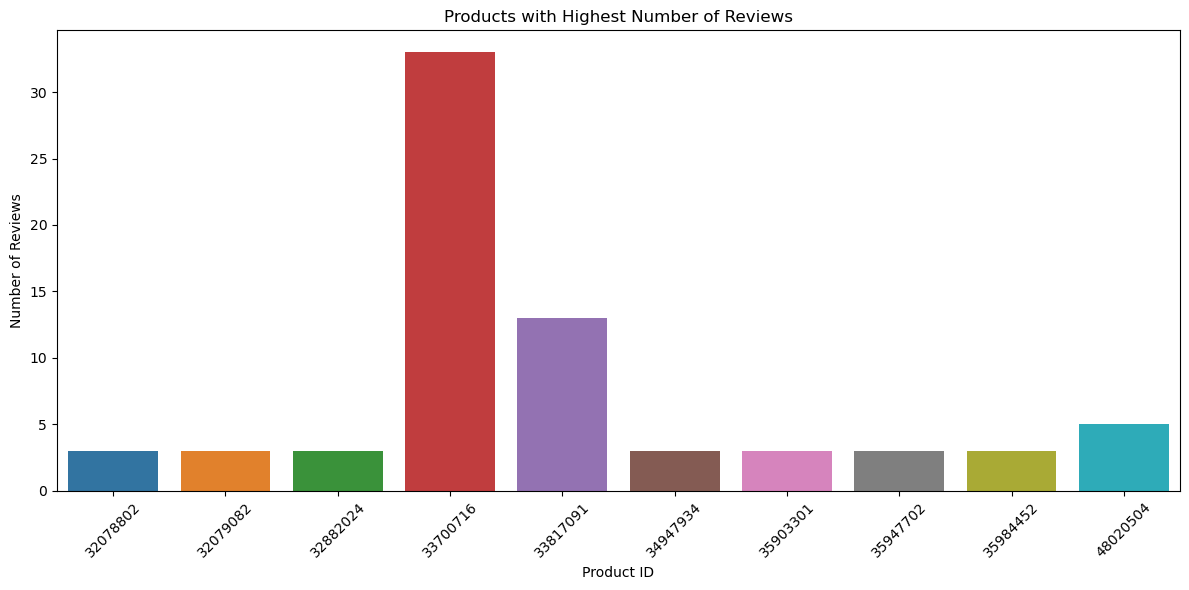

In [384]:

# Assuming 'df' contains columns named 'product_id' and 'review_id'

# Calculate the count of reviews for each product
product_review_counts = df['product_id'].value_counts()

# Get the products with the highest number of reviews
top_products = product_review_counts.head(10) 

# Print the products with the highest number of reviews
print("Top Products by Number of Reviews:")
print(top_products)

# Create a bar plot of the products with the highest number of reviews
plt.figure(figsize=(12, 6))  
sns.barplot(x=top_products.index, y=top_products.values)

# Customize the plot if needed
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.title('Products with Highest Number of Reviews')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# What is the average gross price of products purchased?

In [385]:
# Assuming 'df' contains a column named 'gross_price' representing the gross price of products purchased

# Calculate the average gross price
average_gross_price = df['gross_price'].mean()

# Print the average gross price
print("Average Gross Price of Products Purchased:", average_gross_price)


Average Gross Price of Products Purchased: 27.37899297423888


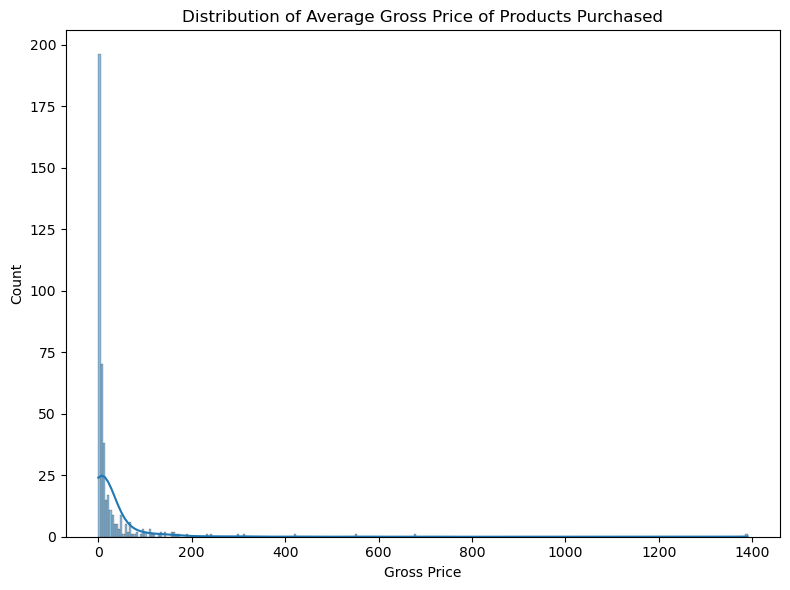

In [386]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains a column named 'gross_price' representing the gross price of products purchased

# Plot the distribution of average gross price using a histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.histplot(data=df, x='gross_price', kde=True)

# Customize the plot if needed
plt.xlabel('Gross Price')
plt.ylabel('Count')
plt.title('Distribution of Average Gross Price of Products Purchased')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# How often do customers make purchases in terms of days or months?

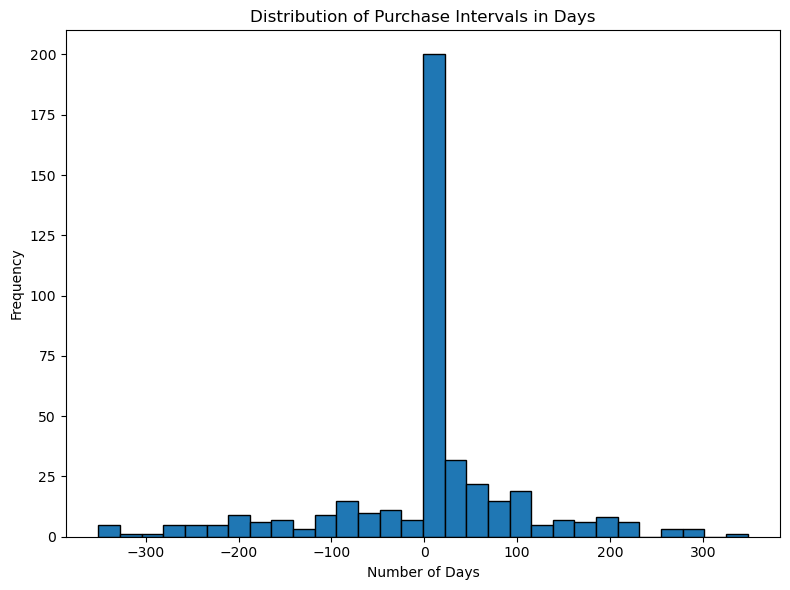

In [387]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' contains a column named 'purchase_datetime' representing the purchase date and time

# Convert 'purchase_datetime' column to datetime data type
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])

# Calculate the time difference between consecutive purchases in days
purchase_diff_days = df['purchase_datetime'].diff().dt.days

# Plot the distribution of purchase intervals in days
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.hist(purchase_diff_days.dropna(), bins=30, edgecolor='black')

# Customize the plot if needed
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Intervals in Days')

# Display the plot
plt.tight_layout()
plt.show()


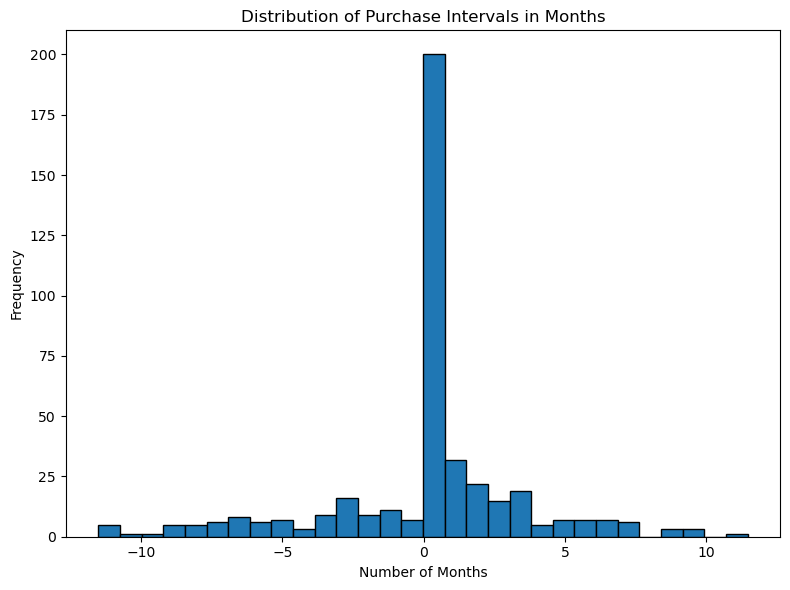

In [388]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' contains a column named 'purchase_datetime' representing the purchase date and time

# Convert 'purchase_datetime' column to datetime data type
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])

# Calculate the time difference between consecutive purchases in months
purchase_diff = df['purchase_datetime'].diff()
purchase_diff_months = purchase_diff / pd.Timedelta(days=30.436875)  # Approximate number of days in a month

# Plot the distribution of purchase intervals in months
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.hist(purchase_diff_months.dropna(), bins=30, edgecolor='black')

# Customize the plot if needed
plt.xlabel('Number of Months')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Intervals in Months')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Days for next Purchase

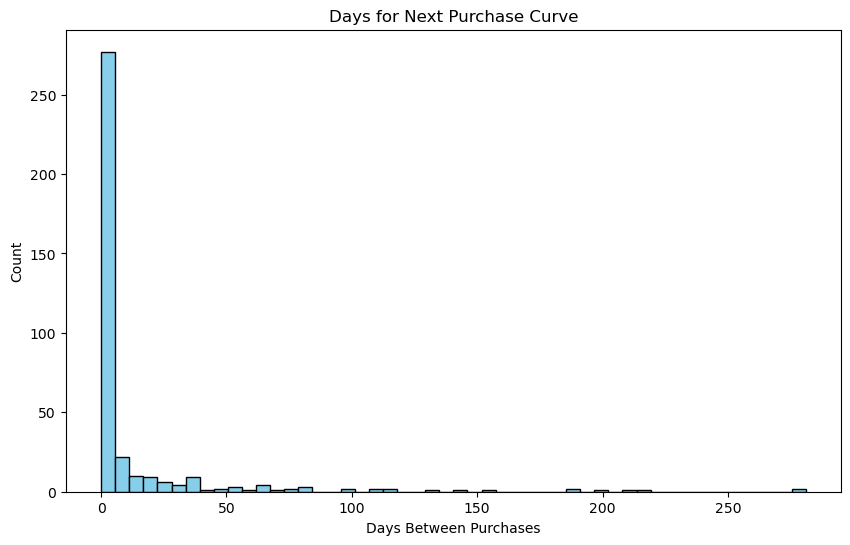

In [389]:
import pandas as pd

# Convert 'purchase_datetime' column to datetime format
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])

# Sort the DataFrame by customer ID and purchase date
df_sorted = df.sort_values(['customer_id', 'purchase_datetime'])

# Calculate the days between consecutive purchases
df_sorted['days_between_purchases'] = df_sorted.groupby('customer_id')['purchase_datetime'].diff().dt.days

# Prepare the "days for next purchase" data
days_between_purchases = df_sorted['days_between_purchases'].dropna().astype(int)

# Plot the "days for next purchase" curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(days_between_purchases, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Days Between Purchases')
plt.ylabel('Count')
plt.title('Days for Next Purchase Curve')
plt.show()


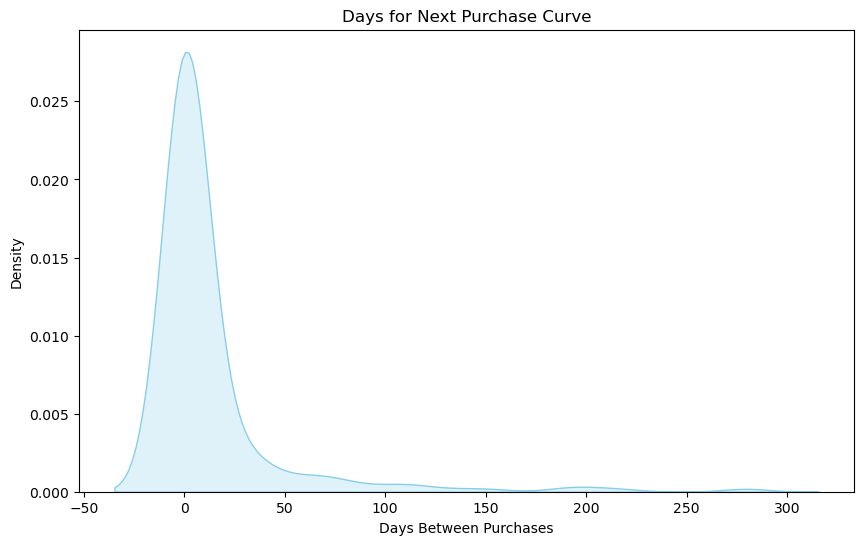

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_sorted, x='days_between_purchases', color='skyblue', fill=True)
plt.xlabel('Days Between Purchases')
plt.ylabel('Density')
plt.title('Days for Next Purchase Curve')
plt.show()


In [391]:
import pandas as pd

# Assuming 'df' is your DataFrame containing purchase data

# Sort the DataFrame by customer ID and purchase date
df_sorted = df.sort_values(['customer_id', 'purchase_datetime'])

# Calculate the difference in days between consecutive purchases
df_sorted['days_diff'] = df_sorted.groupby('customer_id')['purchase_datetime'].diff().dt.days

# Calculate the average difference in days for each customer
average_diff = df_sorted.groupby('customer_id')['days_diff'].mean().reset_index()


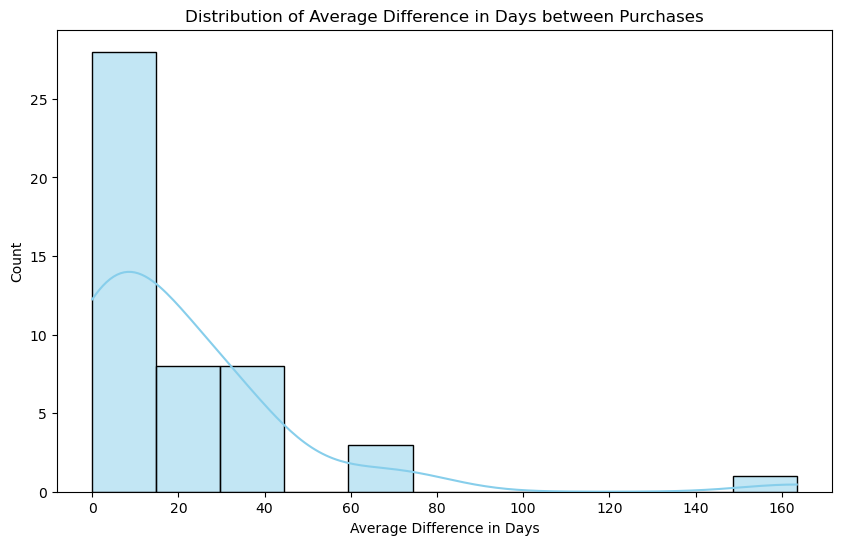

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=average_diff, x='days_diff', kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Average Difference in Days')
plt.ylabel('Count')
plt.title('Distribution of Average Difference in Days between Purchases')
plt.show()


In [ ]:
# Which product classes generate the highest revenue?

In [393]:

# Group the dataframe by 'product_class' and calculate the sum of 'gross_price' for each product class
revenue_by_product_class = df.groupby('product_class')['gross_price'].sum()

# Sort the revenue in descending order to find the product classes generating the highest revenue
top_revenue_product_classes = revenue_by_product_class.sort_values(ascending=False)

# Print the product classes with the highest revenue
print("Product Classes with Highest Revenue:")
print(top_revenue_product_classes)


Product Classes with Highest Revenue:
product_class
6     3097.18
7     2825.89
2     1988.52
13     972.17
3      941.54
11     624.02
12     289.53
10     240.94
14     219.94
8      148.24
9      103.14
1       95.60
5       73.37
4       70.75
Name: gross_price, dtype: float64


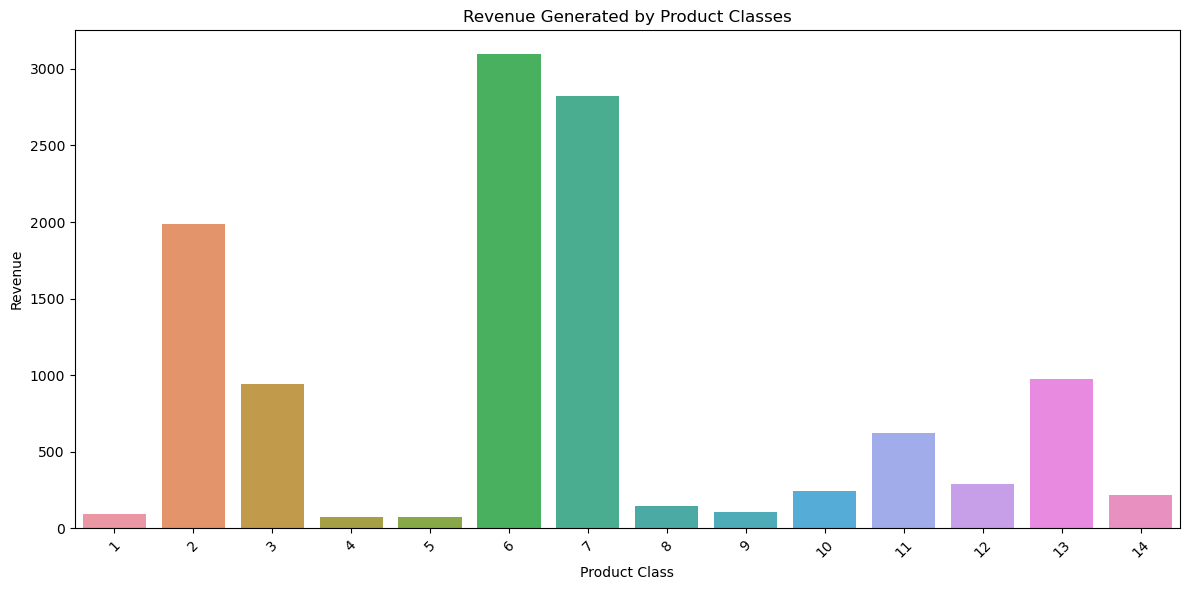

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains columns named 'product_class' and 'gross_price'

# Group the dataframe by 'product_class' and calculate the sum of 'gross_price' for each product class
revenue_by_product_class = df.groupby('product_class')['gross_price'].sum()

# Sort the revenue in descending order to find the product classes generating the highest revenue
top_revenue_product_classes = revenue_by_product_class.sort_values(ascending=False)

# Plot the revenue generated by each product class
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=top_revenue_product_classes.index, y=top_revenue_product_classes.values)

# Customize the plot if needed
plt.xlabel('Product Class')
plt.ylabel('Revenue')
plt.title('Revenue Generated by Product Classes')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# How does price reduction affect the sales of products?

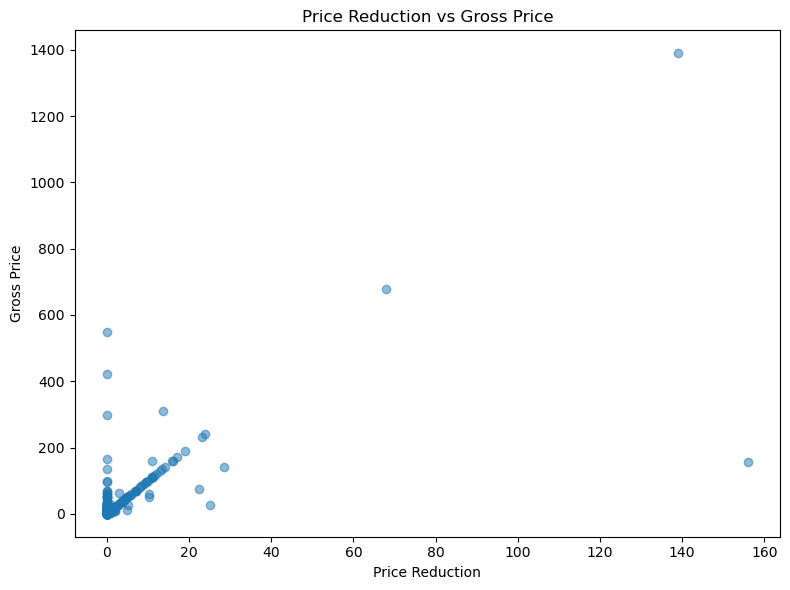

In [395]:
import matplotlib.pyplot as plt

# Assuming 'df' contains columns named 'price_reduction' and 'gross_price'

# Create a scatter plot of price reduction vs gross price
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(df['price_reduction'], df['gross_price'], alpha=0.5)

# Customize the plot if needed
plt.xlabel('Price Reduction')
plt.ylabel('Gross Price')
plt.title('Price Reduction vs Gross Price')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Which stores generate the highest sales revenue?

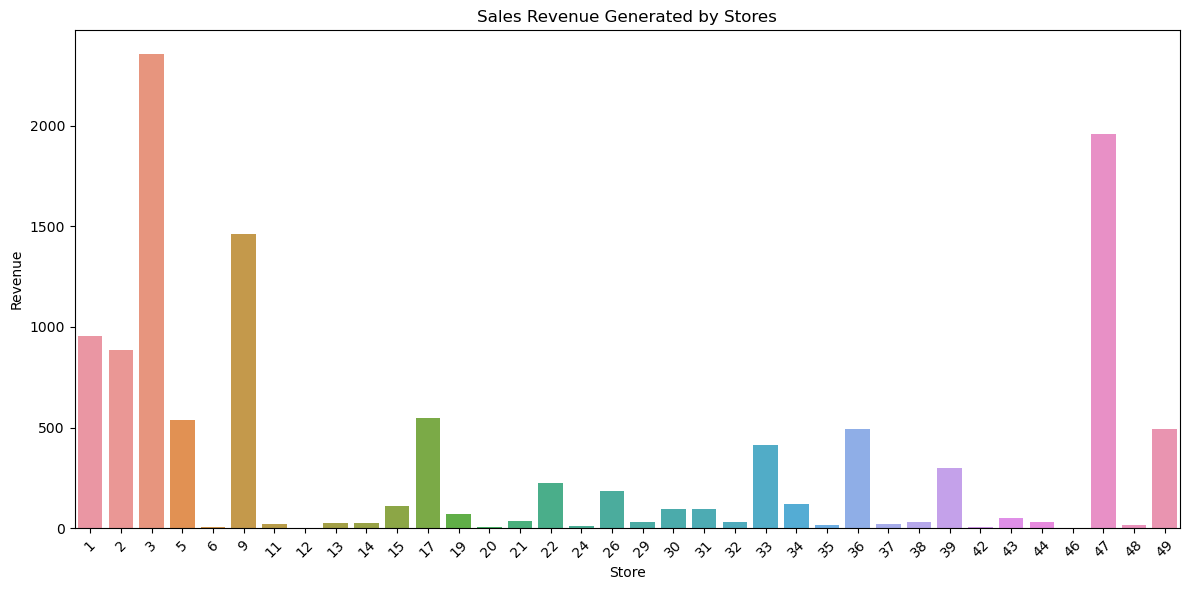

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains columns named 'favorite_store' and 'gross_price'

# Group the dataframe by 'favorite_store' and calculate the sum of 'gross_price' for each store
revenue_by_store = df.groupby('favorite_store')['gross_price'].sum()

# Sort the revenue in descending order to find the stores generating the highest sales revenue
top_revenue_stores = revenue_by_store.sort_values(ascending=False)

# Plot the sales revenue generated by each store
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x=top_revenue_stores.index, y=top_revenue_stores.values)

# Customize the plot if needed
plt.xlabel('Store')
plt.ylabel('Revenue')
plt.title('Sales Revenue Generated by Stores')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# How does customer age correlate with their purchase behavior?

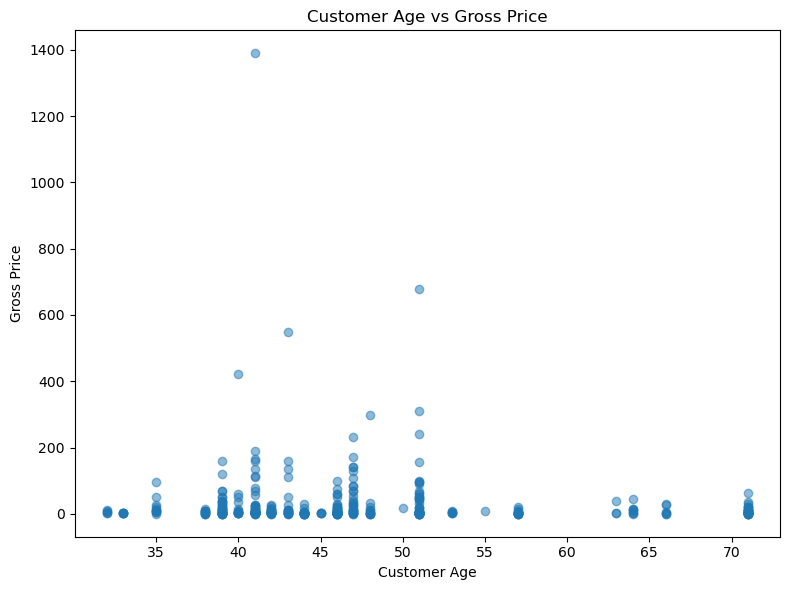

In [399]:
import matplotlib.pyplot as plt

# Create a scatter plot of customer age vs gross price
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(df['customer_age'], df['gross_price'], alpha=0.5)

# Customize the plot if needed
plt.xlabel('Customer Age')
plt.ylabel('Gross Price')
plt.title('Customer Age vs Gross Price')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Are there any correlations between customer gender and favorite store?

C:\Users\Admin\AppData\Local\Temp\ipykernel_19860\3499041737.py:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1000x600 with 0 Axes>

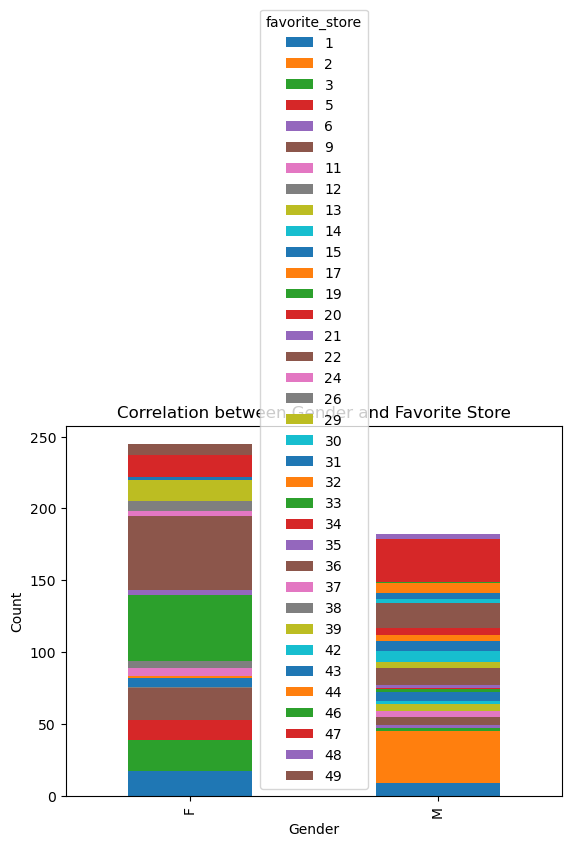

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains columns named 'gender' and 'favorite_store'

# Create a cross-tabulation of gender and favorite store
gender_store_cross_tab = pd.crosstab(df['gender'], df['favorite_store'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
gender_store_cross_tab.plot(kind='bar', stacked=True)

# Customize the plot if needed
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Correlation between Gender and Favorite Store')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# How does customer age relate to their loyalty status?

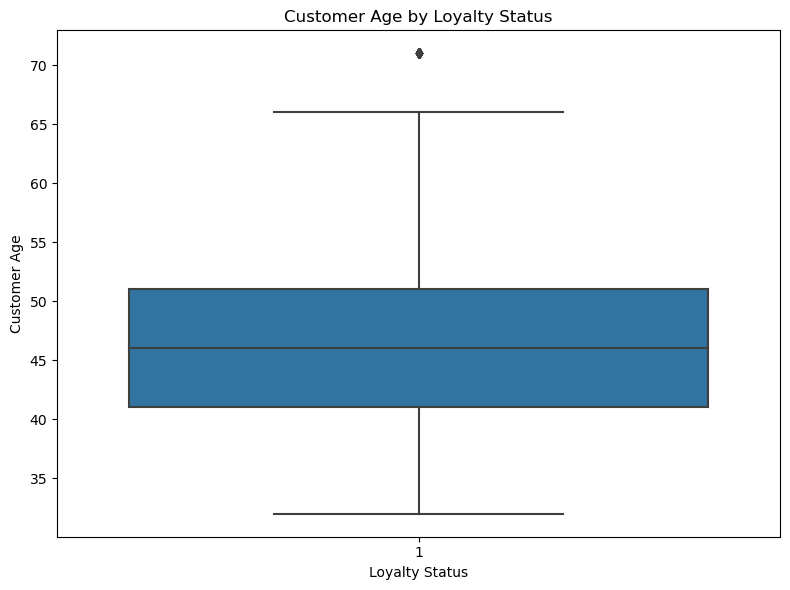

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains columns named 'customer_age' and 'loyalty_status'

# Create a box plot of customer age grouped by loyalty status
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(x=df['loyatlty_status'], y=df['customer_age'])

# Customize the plot if needed
plt.xlabel('Loyalty Status')
plt.ylabel('Customer Age')
plt.title('Customer Age by Loyalty Status')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
############################################## Core1 RFM + Churn Analysis:######################################################

In [ ]:
# Active and Inactive Customers For past 90 days

In [ ]:
import datetime

# Set the cutoff date as the current date minus 90 days
cutoff_date = datetime.datetime.now() - datetime.timedelta(days=90)
# Convert the 'purchase_datetime' column to datetime type
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])

# Calculate Recency, which represents the number of days since the customer's last purchase
recency_data = df.groupby('customer_id')['purchase_datetime'].max().reset_index()
recency_data['recency'] = (cutoff_date - recency_data['purchase_datetime']).dt.days
recency_data.drop('purchase_datetime', axis=1, inplace=True)

In [594]:
# Categorize customers as active or inactive based on the threshold
recency_data['status'] = recency_data['recency'].apply(lambda x: 'Active' if x <= 90 else 'Inactive')


In [595]:
recency_data

customer_id  recency    status
0           658      266  Inactive
1          2344        1    Active
2          7821      233  Inactive
3         20211       -6    Active
4         34088       21    Active
5         40587       90    Active
6         45132      178  Inactive
7         62076      216  Inactive
8         84587      122  Inactive
9         93263       13    Active
10        94505       82    Active
11       112032      259  Inactive
12       173764      240  Inactive
13       181555        6    Active
14       203601        9    Active
15       225861      175  Inactive
16       229985      126  Inactive
17       234763      203  Inactive
18       246969      266  Inactive
19       251068      153  Inactive
20       253998      152  Inactive
21       264555       39    Active
22       289021      220  Inactive
23       298715       15    Active
24       304480       52    Active
25       308545      252  Inactive
26       322448       11    Active
27       350862      334  Inactive
28       352089      270  Inactive
29       406505      -13    Active
30       417080       47    Active
31       420521      307  Inactive
32       429286      279  Inactive
33       431885       15    Active
34       451758      -12    Active
35       458071      237  Inactive
36       465602      274  Inactive
37       474890      198  Inactive
38       531249      196  Inactive
39       548505      226  Inactive
40       571716      103  Inactive
41       572518      143  Inactive
42       589892       -6    Active
43       640999      105  Inactive
44       641026       71    Active
45       664885        4    Active
46       672955      141  Inactive
47       680604       87    Active
48       682978      149  Inactive
49       684219       59    Active
50       692168      116  Inactive
51       693062      -10    Active
52       696001       29    Active
53       749375       61    Active
54       785061       83    Active
55       792819      -12    Active
56       934716      -18    Active

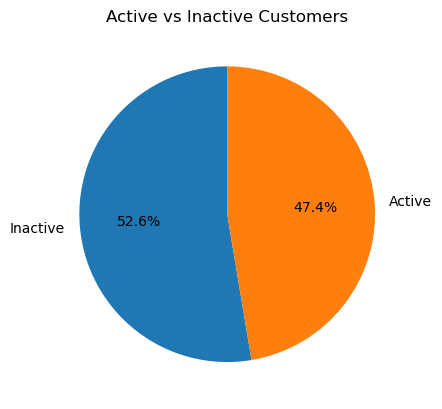

In [585]:
# Count the number of active and inactive customers
status_counts = recency_data['status'].value_counts()

# Create a pie plot
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Active vs Inactive Customers')

# Display the plot
plt.show()

In [579]:
import datetime

# Set the cutoff date as the current date minus 90 days
cutoff_date = datetime.datetime.now() - datetime.timedelta(days=90)

In [580]:
# Convert the 'purchase_datetime' column to datetime type
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])

# Calculate Recency, which represents the number of days since the customer's last purchase
recency_data = df.groupby('customer_id')['purchase_datetime'].max().reset_index()
recency_data['recency'] = (cutoff_date - recency_data['purchase_datetime']).dt.days
recency_data.drop('purchase_datetime', axis=1, inplace=True)

# Calculate Frequency, which represents the total number of purchases made by each customer
frequency_data = df.groupby('customer_id')['purchase_datetime'].count().reset_index()
frequency_data.rename(columns={'purchase_datetime': 'frequency'}, inplace=True)

# Calculate Monetary, which represents the total spending of each customer
monetary_data = df.groupby('customer_id')['gross_price'].sum().reset_index()
monetary_data.rename(columns={'gross_price': 'monetary'}, inplace=True)

# Merge the Recency, Frequency, and Monetary data
rfm_data = pd.merge(recency_data, frequency_data, on='customer_id')
rfm_data = pd.merge(rfm_data, monetary_data, on='customer_id')

# Assign scores or ranks to each RFM value
rfm_data['recency_score'] = pd.qcut(rfm_data['recency'], q=5, labels=False)
rfm_data['frequency_score'] = pd.qcut(rfm_data['frequency'], q=5, labels=False, duplicates='drop')
rfm_data['monetary_score'] = pd.qcut(rfm_data['monetary'], q=5, labels=False)

# Calculate the RFM score by combining the individual scores
rfm_data['rfm_score'] = rfm_data['recency_score'] + rfm_data['frequency_score'] + rfm_data['monetary_score']


In [581]:
rfm_data.head()

customer_id  recency  frequency  monetary  recency_score  frequency_score  \
0          658      266          1      5.49              4                0   
1         2344        1         34    347.33              0                4   
2         7821      233          4     18.90              4                2   
3        20211       -6          6     13.69              0                3   
4        34088       21         18     77.00              1                4   

   monetary_score  rfm_score  
0               0          4  
1               4          8  
2               1          7  
3               1          4  
4               3          8

In [478]:
# Define rfm_level function
def rfm_level(rfm_data):
    if rfm_data['rfm_score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((rfm_data['rfm_score'] >= 8) and (rfm_data['rfm_score'] < 9)):
        return 'Champions'
    elif ((rfm_data['rfm_score'] >= 7) and (rfm_data['rfm_score'] < 8)):
        return 'Loyal'
    elif ((rfm_data['rfm_score'] >= 6) and (rfm_data['rfm_score'] < 7)):
        return 'Potential'
    elif ((rfm_data['rfm_score'] >= 5) and (rfm_data['rfm_score'] < 6)):
        return 'Promising'
    elif ((rfm_data['rfm_score'] >= 4) and (rfm_data['rfm_score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm_data['RFM_Level'] = rfm_data.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm_data.head()

customer_id  recency  frequency  monetary  recency_score  frequency_score  \
0          658      266          1      5.49              4                0   
1         2344        1         34    347.33              0                4   
2         7821      233          4     18.90              4                2   
3        20211       -6          6     13.69              0                3   
4        34088       21         18     77.00              1                4   

   monetary_score  rfm_score        RFM_Level  
0               0          4  Needs Attention  
1               4          8        Champions  
2               1          7            Loyal  
3               1          4  Needs Attention  
4               3          8        Champions

In [479]:
rfm_data["RFM_Level"].value_counts()

Require Activation    12
Champions             10
Needs Attention        9
Can't Loose Them       9
Loyal                  7
Potential              6
Promising              4
Name: RFM_Level, dtype: int64

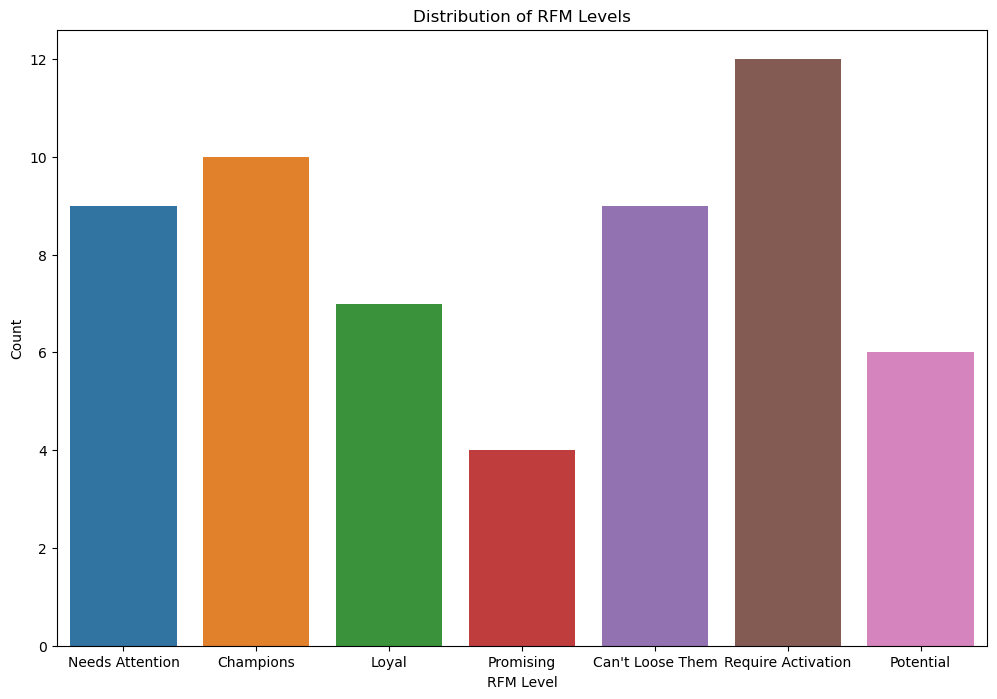

In [480]:
# Plot RFM levels
plt.figure(figsize=(12, 8))
sns.countplot(data=rfm_data, x='RFM_Level')
plt.xlabel('RFM Level')
plt.ylabel('Count')
plt.title('Distribution of RFM Levels')
plt.show()

In [481]:
# # Mean, median, count statistics of different segments
# rfm_data[["RFM_Level","recency","frequency", "monetary"]].groupby("RFM_Level").agg(["mean","median","count"])

In [482]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_df_agg = rfm_data.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
print(rfm_df_agg)

                   recency frequency monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them     154.4      16.4    519.7     9
Champions             98.5      14.8    538.5    10
Loyal                133.9       7.0     49.7     7
Needs Attention      153.4       2.8     17.0     9
Potential            149.2       3.3    142.2     6
Promising            104.8       3.0     39.5     4
Require Activation    70.1       2.1      9.7    12


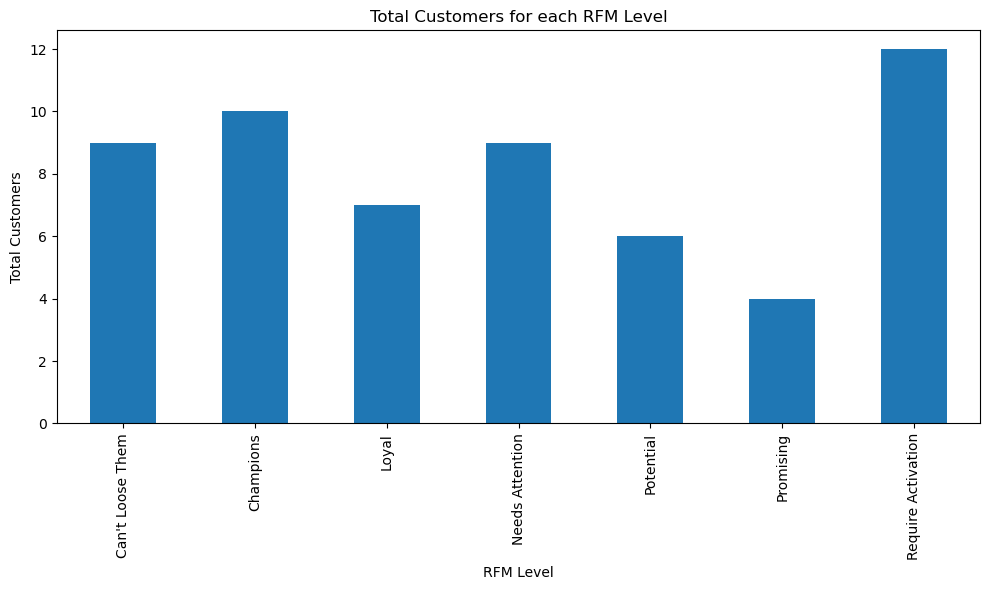

In [483]:
# Rename the columns for clarity
rfm_df_agg.columns = ['Avg. Recency', 'Avg. Frequency', 'Avg. Monetary', 'Total Customers']

# Plot the bar plot
rfm_df_agg['Total Customers'].plot(kind='bar', figsize=(10, 6))

# Customize the plot if needed
plt.xlabel('RFM Level')
plt.ylabel('Total Customers')
plt.title('Total Customers for each RFM Level')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\squarify\__init__.py:231: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



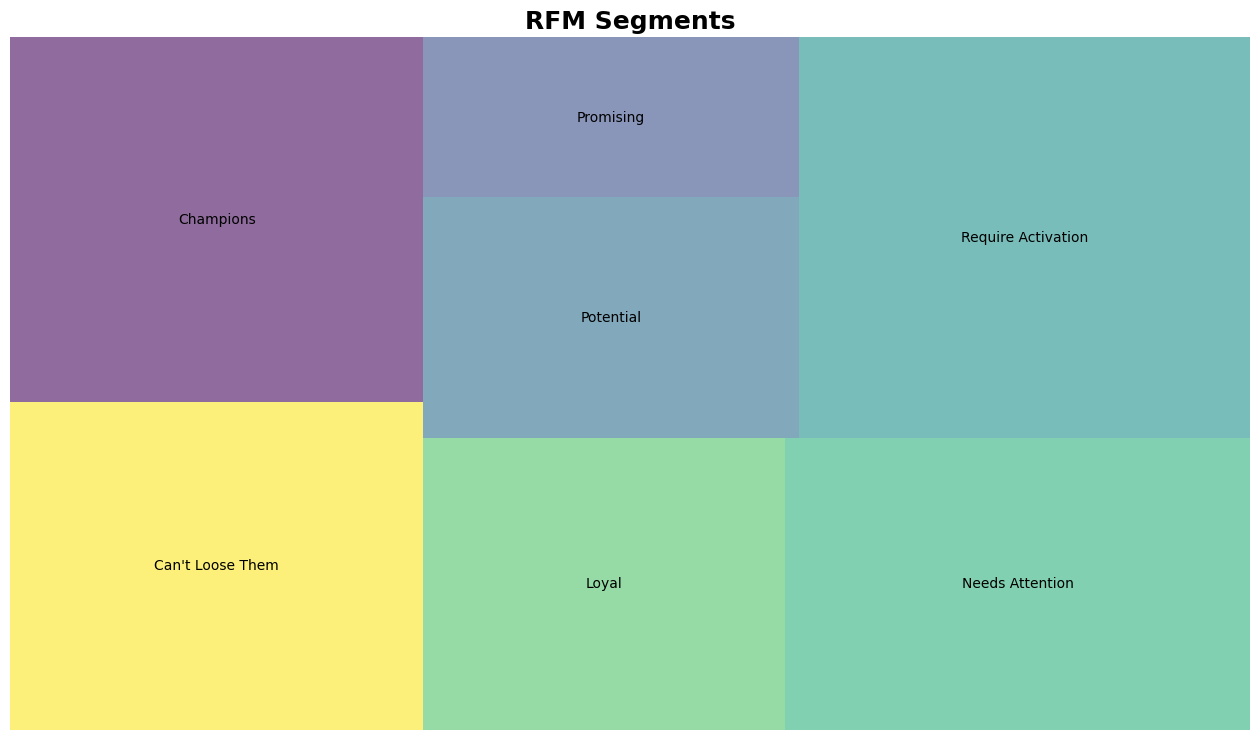

In [484]:
rfm_df_agg.columns = rfm_df_agg.columns
rfm_df_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_df_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential',  #,
                     'Promising', 
                     'Require Activation'
                    ], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
/////////////// K-means with elbow method ///////////////////////

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Adm

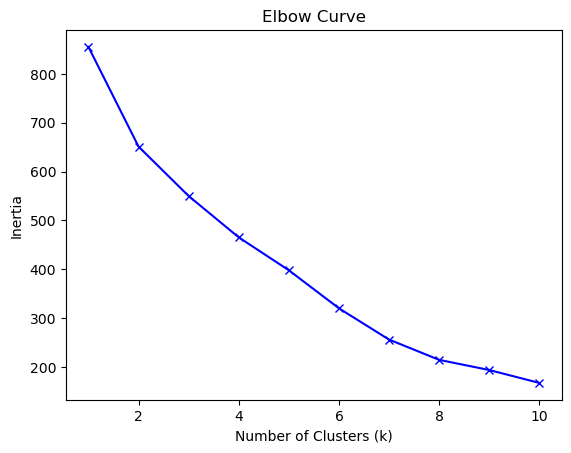

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Admin\AppData\Local\Temp\ipykernel_19860\979204650.py:46: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [485]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

rfm_df_encoded = pd.get_dummies(rfm_data, columns=['RFM_Level'])

# Standardize the RFM data
scaler = StandardScaler()
rfm_data_scaled = scaler.fit_transform(rfm_df_encoded)


inertias = []
k_values = range(1, 11)  # Try different numbers of clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_data_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(rfm_data_scaled)

# Assign the cluster labels to the original DataFrame
rfm_data['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_summary = rfm_data.groupby('Cluster').mean()



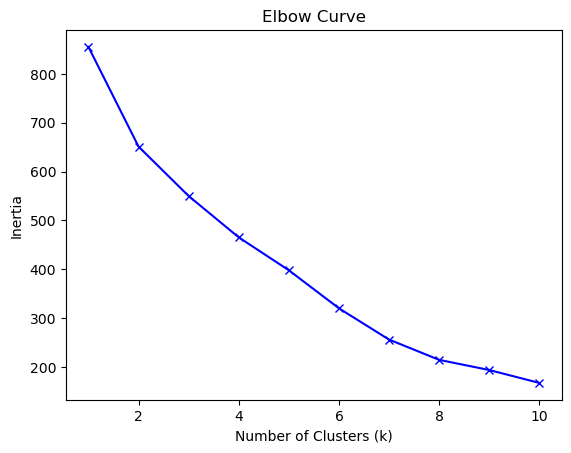

In [486]:
# Plot the elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [487]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(rfm_df_encoded)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [488]:
rfm_data.head()

customer_id  recency  frequency  monetary  recency_score  frequency_score  \
0          658      266          1      5.49              4                0   
1         2344        1         34    347.33              0                4   
2         7821      233          4     18.90              4                2   
3        20211       -6          6     13.69              0                3   
4        34088       21         18     77.00              1                4   

   monetary_score  rfm_score        RFM_Level  Cluster  
0               0          4  Needs Attention        2  
1               4          8        Champions        0  
2               1          7            Loyal        1  
3               1          4  Needs Attention        2  
4               3          8        Champions        0

In [489]:
rfm_data.shape

(57, 10)

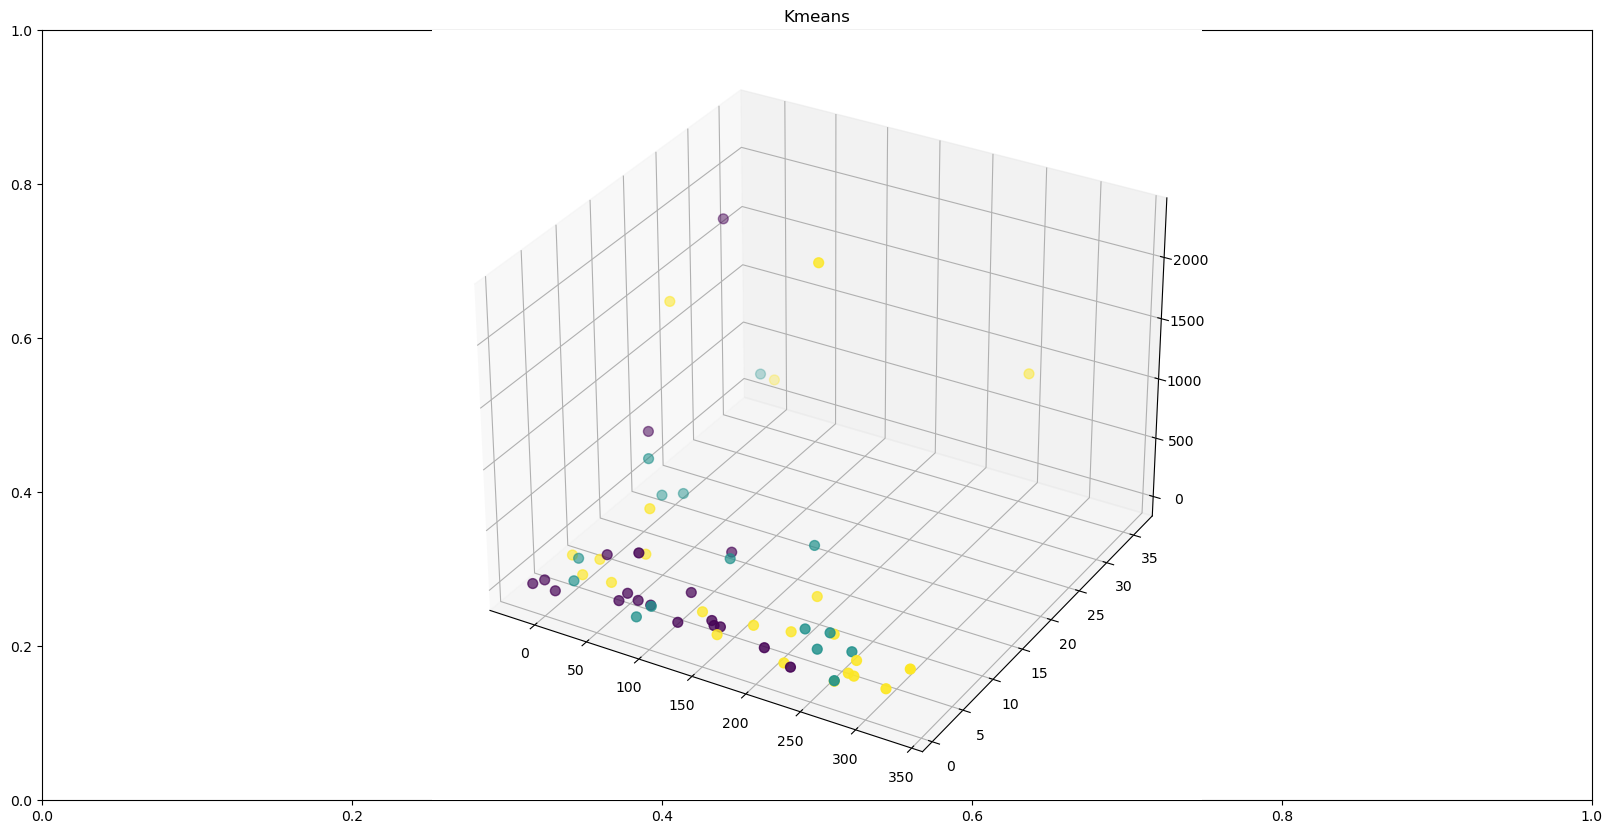

In [490]:
plt.figure(figsize = (20,10))
plt.title("Kmeans")
ax = plt.axes(projection='3d')
fg = ax.scatter3D(rfm_data['recency'],rfm_data['frequency'],rfm_data['monetary'],s = 50, c = y_kmeans,)

In [491]:
silhouette_avg = silhouette_score(rfm_df_encoded,y_kmeans)
print("For n_clusters =", 3 ,"The average silhouette_score is :",silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.5988554432976071


In [ ]:
////////////////////////////////////using k-means with pca to plot in 2 d/////////////////////////////////////

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



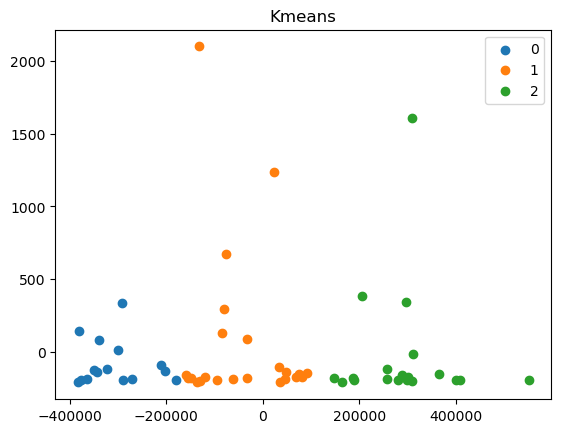

In [492]:
#Importing required modules
 
from sklearn.decomposition import PCA
import numpy as np
 
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(rfm_df_encoded)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.title("Kmeans")
plt.show()

In [493]:
# for the 2d data
silhouette_avg = silhouette_score(df,label)
print("For n_clusters =", 3 ,"The average silhouette_score is :",silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5988566664296017


In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
# Core 01 Customer Focus: prevention of the churn of high value customers by a marketing 
# campaign for customer retention [CHURN + RFM];

In [ ]:
# Calculate the monetary value for each customer by aggregating their total spending (gross_price) over a given period:

In [502]:
import pandas as pd

# Aggregate the total spending per customer
customer_monetary_value = df.groupby('customer_id')['gross_price'].sum()

# Convert the result into a DataFrame
customer_monetary_value = pd.DataFrame(customer_monetary_value)
customer_monetary_value.reset_index(inplace=True)  # Reset index for further processing

# Rename the column to reflect the monetary value
customer_monetary_value.rename(columns={'gross_price': 'monetary_value'}, inplace=True)


In [495]:
# Sort the customers based on their monetary value:

In [503]:
# Sort the customers based on their monetary value in descending order
customer_monetary_value.sort_values('monetary_value', ascending=False, inplace=True)

In [504]:
customer_monetary_value.head()

customer_id  monetary_value
19       251068         2309.65
51       693062         1809.68
29       406505         1438.51
25       308545          885.91
42       589892          582.50

In [505]:
customer_monetary_value.shape

(57, 2)

In [506]:
# Select the top percentage of customers as high-value customers:

In [507]:
# Determine the number of customers to select as high-value customers (e.g., top 20%)
top_percentage = 0.24 # 24%
num_high_value_customers = int(len(customer_monetary_value) * top_percentage)

# Select the top percentage of customers as high-value customers
high_value_customers = customer_monetary_value.head(num_high_value_customers)

In [508]:
high_value_customers

customer_id  monetary_value
19       251068         2309.65
51       693062         1809.68
29       406505         1438.51
25       308545          885.91
42       589892          582.50
47       680604          549.50
9         93263          536.13
24       304480          494.31
1          2344          347.33
23       298715          330.95
27       350862          299.00
6         45132          291.88
8         84587          218.28

In [509]:
# Perform churn analysis and determine the churn status of each high-value customer

In [510]:
# Define the time period for churn analysis, such as the last 90 days. Set the cutoff date for the analysis.

In [511]:
import datetime

# Set the cutoff date as the current date minus 365 days
cutoff_date = datetime.datetime.now() - datetime.timedelta(days=365)

# Convert the cutoff date to datetime64[ns] type
cutoff_date = pd.to_datetime(cutoff_date)

# Filter the purchase data of high-value customers within the churn analysis period
# high_value_customer_ids = high_value_customers['customer_id'].tolist()
churn_analysis_data = df[df['customer_id'] & (pd.to_datetime(df['purchase_datetime']) >= cutoff_date)]


In [512]:
churn_analysis_data.head()

address_id  postal_code district          region  customer_id   birthdate  \
0         6962        29121       PC  EMILIA ROMAGNA         7821  1984-10-03   
1       228406        24022       BG       LOMBARDIA       246969  1978-12-27   
3       278496          125       RM           LAZIO       298715  1977-04-29   
4       385332         6059       PG          UMBRIA       406505  1976-04-26   
11      625158          148       RM           LAZIO       640999  1974-07-11   

   gender job_type               email_provider  flag_phone_provided  ...  \
0       M        0                    gmail.com                  1.0  ...   
1       F        0  personal_mail_provider_7382                  1.0  ...   
3       F        0                    gmail.com                  0.0  ...   
4       F        0                    gmail.com                  1.0  ...   
11      F        0                   hotmail.it                  1.0  ...   

    loyatlty_status  activation_date                          order_id  \
0                 1       2022-04-06  cff01b663e65a4a426add3d3591dd113   
1                 1       2022-03-13  8f7735a267cccb1e922a38d31b8f4b0b   
3                 1       2022-04-08  61b4e60e8f1503508a0f739e43b49df1   
4                 1       2022-06-02  de7f5649c28e00f03cace55339474a35   
11                1       2022-11-08  ab5a674b6e9939cd62be6e12cbeb3386   

    store_id product_id  direction gross_price price_reduction  \
0         11   33700716          1         0.2             0.0   
1         40   33700716          1         0.2             0.0   
3         39   33700716          1         0.2             0.0   
4          9   33700716          1         0.2             0.0   
11        33   33700716          1         0.2             0.0   

      purchase_datetime  product_class  
0   2022-08-23 13:13:03             10  
1   2022-07-21 11:50:07             10  
3   2023-03-28 12:30:35             10  
4   2022-08-04 18:25:49             10  
11  2022-11-08 18:58:01             10  

[5 rows x 25 columns]

In [513]:
churn_analysis_data.shape

(142, 25)

In [514]:
COUNT  = churn_analysis_data['customer_id'].nunique()
COUNT

30

In [515]:
# Group the churn analysis data by customer and count the number of purchases
customer_purchases = churn_analysis_data.groupby('customer_id')['purchase_datetime'].count()

# Identify churned customers who have no purchases within the churn analysis period
churned_customers = customer_purchases[customer_purchases < 12].index.tolist()

In [516]:
customer_purchases

customer_id
7821       4
20211      6
40587      2
84587      9
93263     12
94505      1
181555    17
203601     2
225861     4
229985     1
234763     1
246969     1
264555     4
289021     1
298715     4
308545    16
352089     2
406505     9
431885     6
458071     6
531249     2
548505     1
640999    12
664885     1
672955     3
684219     2
696001     5
749375     3
785061     3
792819     2
Name: purchase_datetime, dtype: int64

In [517]:
churned_customers

[7821,
 20211,
 40587,
 84587,
 94505,
 203601,
 225861,
 229985,
 234763,
 246969,
 264555,
 289021,
 298715,
 352089,
 406505,
 431885,
 458071,
 531249,
 548505,
 664885,
 672955,
 684219,
 696001,
 749375,
 785061,
 792819]

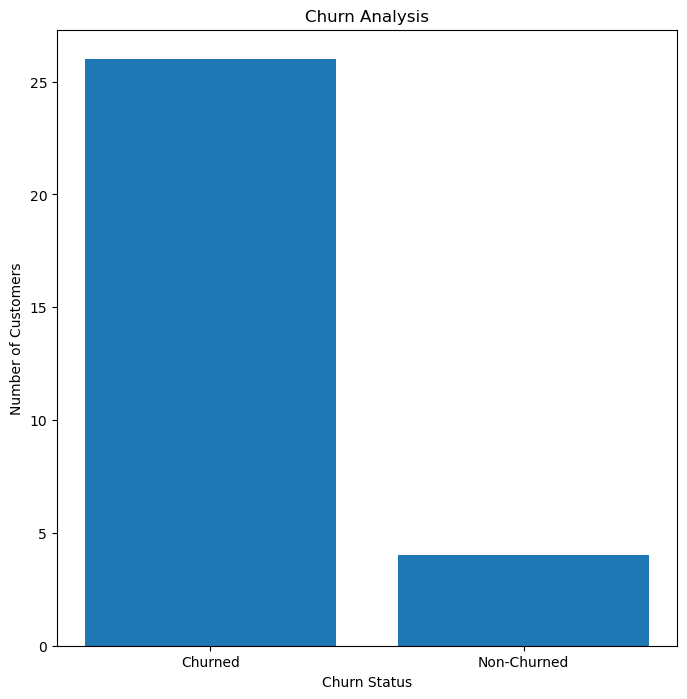

In [518]:

# Count the number of churned customers
num_churned = len(churned_customers)

# Plot the number of churned customers
plt.figure(figsize=(8, 8))
plt.bar(['Churned', 'Non-Churned'], [num_churned, len(customer_purchases) - num_churned])
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Churn Analysis')
plt.show()


In [519]:
notChurned = len(customer_purchases) - num_churned
notChurned

4

In [520]:
rfm_data['Churn'] = 0
rfm_data.loc[(rfm_data['recency'] <= recency_threshold) & (rfm_data['frequency'] >= frequency_threshold) & (rfm_data['monetary'] >= monetary_threshold), 'Churn'] = 1


In [521]:
dfChurn = pd.merge(df, rfm_data, on='customer_id')
# Select the relevant attributes for churn prediction
dfChurn = dfChurn[['customer_id','recency', 'activation_date', 'loyatlty_status', 'Churn']]

In [522]:
dfChurn.drop_duplicates().head()

customer_id  recency activation_date  loyatlty_status  Churn
0          7821      233      2022-04-06                1      0
4        246969      266      2022-03-13                1      0
5        298715       15      2022-04-08                1      1
39       406505      -14      2022-06-02                1      1
61       693062      -10      2022-12-06                1      1

In [542]:
# Make churn probability predictions using the trained model
X_pred = dfChurn[['Recency', 'loyatlty_status']]
dfChurn['churn_probability'] = model.predict_proba(X_pred)[:, 1]


In [544]:
dfChurn.drop_duplicates().head()

Recency  loyatlty_status  Churn  churn_probability
0         4                1      0           0.197716
4         1                1      0           0.156514
5        34                1      1           0.807997
39       22                1      1           0.574926
61       30                1      1           0.742440

In [523]:
# Applying Machine Learning Algorithms for churn prediction, such as Logistic Regression, 
# Random Forest, Multilayer Perceptrons, Decision Tree or Gradient Boosting Machine. 
# Fit the selected model to the training data.

In [524]:
from sklearn.model_selection import train_test_split

X = dfChurn[['customer_id', 'recency', 'activation_date', 'loyatlty_status']]
y = dfChurn['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [525]:
X_train

customer_id  recency activation_date  loyatlty_status
66        693062      -10      2022-12-06                1
132       458071      237      2022-07-02                1
223       572518      143      2022-09-21                1
31        298715       15      2022-04-08                1
84        693062      -10      2022-12-06                1
..           ...      ...             ...              ...
71        693062      -10      2022-12-06                1
106       640999      105      2022-11-08                1
270       474890      198      2022-07-14                1
348        45132      178      2022-04-15                1
102       640999      105      2022-11-08                1

[341 rows x 4 columns]

In [526]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [527]:
# Convert 'purchase_datetime' column to datetime format
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'])

# Merge the relevant attributes from dfOrders and dfCusAcc DataFrames based on the common column(s)
dfChurn = pd.merge(df, rfm_data, on='customer_id')

# Select the necessary features for churn prediction
dfChurn = dfChurn[['customer_id', 'purchase_datetime', 'loyatlty_status', 'Churn']]

# Calculate purchase frequency for each customer
dfChurn['Recency'] = dfChurn.groupby('customer_id')['purchase_datetime'].transform('count')

# Select the final features for churn prediction
dfChurn = dfChurn[['Recency', 'loyatlty_status', 'Churn']]

# Split the data into training and testing sets
X = dfChurn[['Recency', 'loyatlty_status']]
y = dfChurn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7790697674418605
Precision: 0.775
Recall: 0.7560975609756098
F1-score: 0.7654320987654322


In [286]:
### Random Forest Classifier

In [528]:

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)


In [529]:
#Returns the mean accuracy on the given test data and labels.
print("Accuracy:", f"{round(rf_clf.score(X_test, y_test), 4):.2%}")

Accuracy: 93.02%


In [530]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9302325581395349
Precision: 0.8723404255319149
Recall: 1.0
F1-score: 0.9318181818181819


In [ ]:
### Multilayer Perceptron

In [531]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mlp_clf = MLPClassifier()  # Instantiate an instance of the MLPClassifier
mlp_clf.fit(X_train, y_train)  # Fit the model to the training data

y_pred = mlp_clf.predict(X_test)  # Make predictions on the test data

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.813953488372093
Precision: 0.7192982456140351
Recall: 1.0
F1-score: 0.8367346938775511


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
###  Gradient Boosting Machine

In [532]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Gradient Boosting Classifier
gbm_clf = GradientBoostingClassifier() 

# Fit the model to the training data
gbm_clf.fit(X_train, y_train)  

# Make predictions on the test data
y_pred = gbm_clf.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9302325581395349
Precision: 0.8723404255319149
Recall: 1.0
F1-score: 0.9318181818181819


In [ ]:
# Decision Tree

In [534]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
# Create a Decision Tree classifier
dct_clf = DecisionTreeClassifier()

# Fit the model to the training data
dct_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dct_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9302325581395349
Precision: 1.0
Recall: 0.8536585365853658
F1-score: 0.9210526315789475


In [ ]:
### ROC curve and AUC

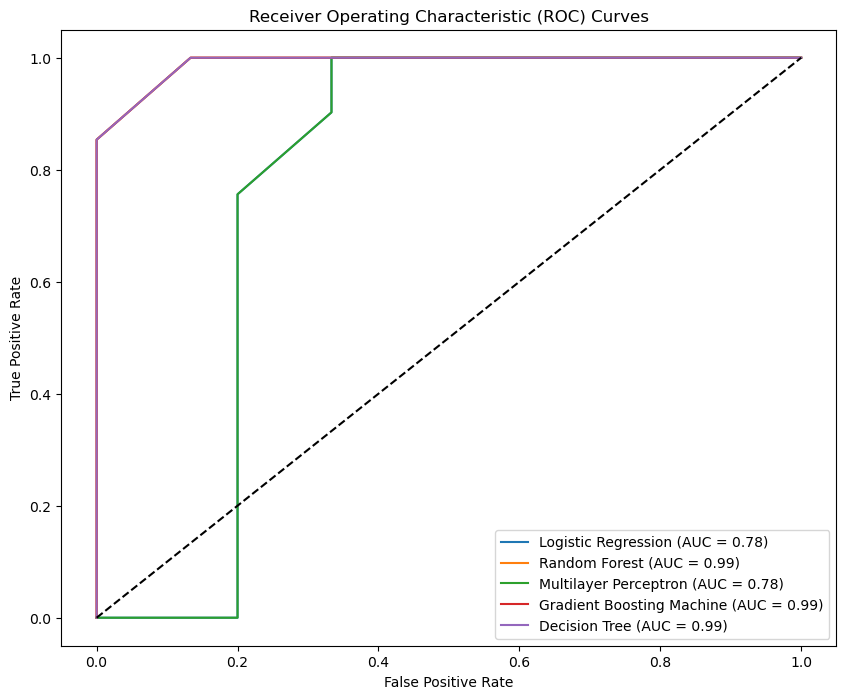

In [535]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifiers = {
    "Logistic Regression": model,
    "Random Forest": rf_clf,
    "Multilayer Perceptron": mlp_clf,
    "Gradient Boosting Machine": gbm_clf,
    "Decision Tree" : dct_clf
}

plt.figure(figsize=(10, 8))

# Plot ROC curve for each classifier
for name, clf in classifiers.items():
    y_pred_probs = clf.predict_proba(X_test)[:, 1] 
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
################################################# Core2 Perform Market Basket Analysis:############################################

In [536]:
import pandas as pd

In [537]:
df = pd.read_csv('dataframe.csv')

In [538]:
# Drop rows where direction = -1
df = df[df['direction'] != -1].copy()

In [539]:
dfMBA = df[['order_id', 'product_id']]

In [540]:
dfMBA

order_id  product_id
0    cff01b663e65a4a426add3d3591dd113    33700716
1    8f7735a267cccb1e922a38d31b8f4b0b    33700716
2    8025322b509df76b6684eca2d262fde7    33700716
3    61b4e60e8f1503508a0f739e43b49df1    33700716
4    de7f5649c28e00f03cace55339474a35    33700716
..                                ...         ...
426  b98c18f96112faa2d318ca4afadbdc81    35738850
427  b98c18f96112faa2d318ca4afadbdc81    35196315
428  b98c18f96112faa2d318ca4afadbdc81    36509193
429  e5b31a4059a55ddd5b390c0fbd28a279    34686834
430  e5b31a4059a55ddd5b390c0fbd28a279    35940576

[427 rows x 2 columns]

In [310]:
transactions_str = dfMBA.groupby(['order_id', 'product_id'])['product_id'].count().reset_index(name ='Count')
transactions_str.head()

order_id  product_id  Count
0  06490008ab9b32f97b03853a5b103ea9    33937225      1
1  0764213ae60a16a7a3e80cc6a0830134    36135855      1
2  09004fe9c2861a39bae40fabe0e8b89f    33724201      1
3  09004fe9c2861a39bae40fabe0e8b89f    34399050      1
4  0d3b231a78d96dad4ac60e9433de28dc    36276513      1

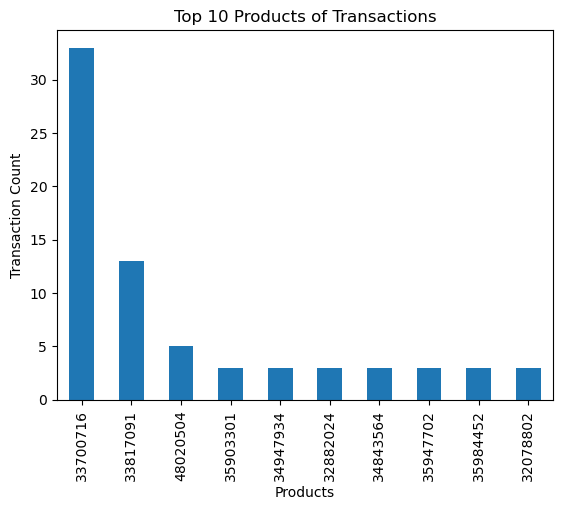

In [311]:
# Group transactions by category and calculate transaction count
category_counts = transactions_str['product_id'].value_counts()

# Select the top 50 categories with the highest transaction count
top_50_categories = category_counts.head(10)

# Plot the top 50 categories using a bar plot
top_50_categories.plot(kind='bar')

# Customize the plot
plt.xlabel('Products')
plt.ylabel('Transaction Count')
plt.title('Top 10 Products of Transactions')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [312]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='order_id', columns='product_id', values='Count', aggfunc='sum').fillna(0)
my_basket.head()

product_id                        30062452  30097340  30126292  30293361  \
order_id                                                                   
06490008ab9b32f97b03853a5b103ea9       0.0       0.0       0.0       0.0   
0764213ae60a16a7a3e80cc6a0830134       0.0       0.0       0.0       0.0   
09004fe9c2861a39bae40fabe0e8b89f       0.0       0.0       0.0       0.0   
0d3b231a78d96dad4ac60e9433de28dc       0.0       0.0       0.0       0.0   
11444e8304c770cbce7575db9c6231b2       0.0       0.0       0.0       0.0   

product_id                        30809730  31041766  31041780  31041850  \
order_id                                                                   
06490008ab9b32f97b03853a5b103ea9       0.0       0.0       0.0       0.0   
0764213ae60a16a7a3e80cc6a0830134       0.0       0.0       0.0       0.0   
09004fe9c2861a39bae40fabe0e8b89f       0.0       0.0       0.0       0.0   
0d3b231a78d96dad4ac60e9433de28dc       0.0       0.0       0.0       0.0   
11444e8304c770cbce7575db9c6231b2       0.0       0.0       0.0       0.0   

product_id                        31056312  31087273  ...  81250370  81250869  \
order_id                                              ...                       
06490008ab9b32f97b03853a5b103ea9       0.0       0.0  ...       0.0       0.0   
0764213ae60a16a7a3e80cc6a0830134       0.0       0.0  ...       0.0       0.0   
09004fe9c2861a39bae40fabe0e8b89f       0.0       0.0  ...       0.0       0.0   
0d3b231a78d96dad4ac60e9433de28dc       0.0       0.0  ...       0.0       0.0   
11444e8304c770cbce7575db9c6231b2       0.0       0.0  ...       0.0       0.0   

product_id                        81259474  81259511  81259556  81259558  \
order_id                                                                   
06490008ab9b32f97b03853a5b103ea9       0.0       0.0       0.0       0.0   
0764213ae60a16a7a3e80cc6a0830134       0.0       0.0       0.0       0.0   
09004fe9c2861a39bae40fabe0e8b89f       0.0       0.0       0.0       0.0   
0d3b231a78d96dad4ac60e9433de28dc       0.0       0.0       0.0       0.0   
11444e8304c770cbce7575db9c6231b2       0.0       0.0       0.0       0.0   

product_id                        81273175  81274749  82040488  82042968  
order_id                                                                  
06490008ab9b32f97b03853a5b103ea9       0.0       0.0       0.0       0.0  
0764213ae60a16a7a3e80cc6a0830134       0.0       0.0       0.0       0.0  
09004fe9c2861a39bae40fabe0e8b89f       0.0       0.0       0.0       0.0  
0d3b231a78d96dad4ac60e9433de28dc       0.0       0.0       0.0       0.0  
11444e8304c770cbce7575db9c6231b2       0.0       0.0       0.0       0.0  

[5 rows x 318 columns]

In [313]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

product_id                        30062452  30097340  30126292  30293361  \
order_id                                                                   
06490008ab9b32f97b03853a5b103ea9         0         0         0         0   
0764213ae60a16a7a3e80cc6a0830134         0         0         0         0   
09004fe9c2861a39bae40fabe0e8b89f         0         0         0         0   
0d3b231a78d96dad4ac60e9433de28dc         0         0         0         0   
11444e8304c770cbce7575db9c6231b2         0         0         0         0   

product_id                        30809730  31041766  31041780  31041850  \
order_id                                                                   
06490008ab9b32f97b03853a5b103ea9         0         0         0         0   
0764213ae60a16a7a3e80cc6a0830134         0         0         0         0   
09004fe9c2861a39bae40fabe0e8b89f         0         0         0         0   
0d3b231a78d96dad4ac60e9433de28dc         0         0         0         0   
11444e8304c770cbce7575db9c6231b2         0         0         0         0   

product_id                        31056312  31087273  ...  81250370  81250869  \
order_id                                              ...                       
06490008ab9b32f97b03853a5b103ea9         0         0  ...         0         0   
0764213ae60a16a7a3e80cc6a0830134         0         0  ...         0         0   
09004fe9c2861a39bae40fabe0e8b89f         0         0  ...         0         0   
0d3b231a78d96dad4ac60e9433de28dc         0         0  ...         0         0   
11444e8304c770cbce7575db9c6231b2         0         0  ...         0         0   

product_id                        81259474  81259511  81259556  81259558  \
order_id                                                                   
06490008ab9b32f97b03853a5b103ea9         0         0         0         0   
0764213ae60a16a7a3e80cc6a0830134         0         0         0         0   
09004fe9c2861a39bae40fabe0e8b89f         0         0         0         0   
0d3b231a78d96dad4ac60e9433de28dc         0         0         0         0   
11444e8304c770cbce7575db9c6231b2         0         0         0         0   

product_id                        81273175  81274749  82040488  82042968  
order_id                                                                  
06490008ab9b32f97b03853a5b103ea9         0         0         0         0  
0764213ae60a16a7a3e80cc6a0830134         0         0         0         0  
09004fe9c2861a39bae40fabe0e8b89f         0         0         0         0  
0d3b231a78d96dad4ac60e9433de28dc         0         0         0         0  
11444e8304c770cbce7575db9c6231b2         0         0         0         0  

[5 rows x 318 columns]

In [314]:
my_basket_sets.shape

(187, 318)

In [315]:

# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0   0.010695                                         (30809730)
1   0.010695                                         (31041850)
2   0.010695                                         (31087273)
3   0.010695                                         (32078795)
4   0.016043                                         (32078802)
..       ...                                                ...
81  0.010695           (32078802, 32078795, 33700716, 32078935)
82  0.010695           (32078802, 32078795, 33700716, 32079082)
83  0.010695           (32079082, 32078795, 33700716, 32078935)
84  0.010695           (32078802, 33700716, 32079082, 32078935)
85  0.010695  (32079082, 32078795, 33700716, 32078802, 32078...

[86 rows x 2 columns]

In [316]:
# now making the rules from frequent itemset generated above
from mlxtend.frequent_patterns import association_rules, apriori

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

antecedents                     consequents  antecedent support  \
94   (32078802, 32078935)            (32079082, 32078795)            0.010695   
109  (32078795, 33700716)            (32078802, 32078935)            0.010695   
111  (33700716, 32078935)            (32078802, 32078795)            0.010695   
113            (32078795)  (32078802, 33700716, 32078935)            0.010695   
115            (32078935)  (32078802, 32078795, 33700716)            0.010695   
..                    ...                             ...                 ...   
20             (33700716)                      (35947702)            0.176471   
114            (33700716)  (32078802, 32078795, 32078935)            0.176471   
74             (33700716)            (32078802, 32078935)            0.176471   
56             (33700716)            (32078795, 32078935)            0.176471   
45             (33700716)            (32078802, 32078795)            0.176471   

     consequent support   support  confidence       lift  leverage  \
94             0.010695  0.010695    1.000000  93.500000  0.010581   
109            0.010695  0.010695    1.000000  93.500000  0.010581   
111            0.010695  0.010695    1.000000  93.500000  0.010581   
113            0.010695  0.010695    1.000000  93.500000  0.010581   
115            0.010695  0.010695    1.000000  93.500000  0.010581   
..                  ...       ...         ...        ...       ...   
20             0.016043  0.010695    0.060606   3.777778  0.007864   
114            0.010695  0.010695    0.060606   5.666667  0.008808   
74             0.010695  0.010695    0.060606   5.666667  0.008808   
56             0.010695  0.010695    0.060606   5.666667  0.008808   
45             0.010695  0.010695    0.060606   5.666667  0.008808   

     conviction  zhangs_metric  
94          inf       1.000000  
109         inf       1.000000  
111         inf       1.000000  
113         inf       1.000000  
115         inf       1.000000  
..          ...            ...  
20     1.047438       0.892857  
114    1.053131       1.000000  
74     1.053131       1.000000  
56     1.053131       1.000000  
45     1.053131       1.000000  

[188 rows x 10 columns]

In [317]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

antecedents                               consequents  \
94   (32078802, 32078935)                      (32079082, 32078795)   
41   (32078802, 33700716)                                (32078795)   
52   (32078795, 33700716)                                (32078935)   
51             (32078935)                      (32079082, 32078795)   
50             (32078795)                      (32079082, 32078935)   
..                    ...                                       ...   
155            (33700716)            (32078802, 32079082, 32078935)   
185            (33700716)  (32078802, 32079082, 32078795, 32078935)   
86             (33700716)                      (32079082, 32078935)   
80             (33700716)                      (32078802, 32079082)   
45             (33700716)                      (32078802, 32078795)   

     antecedent support  consequent support   support  confidence       lift  \
94             0.010695            0.010695  0.010695    1.000000  93.500000   
41             0.010695            0.010695  0.010695    1.000000  93.500000   
52             0.010695            0.010695  0.010695    1.000000  93.500000   
51             0.010695            0.010695  0.010695    1.000000  93.500000   
50             0.010695            0.010695  0.010695    1.000000  93.500000   
..                  ...                 ...       ...         ...        ...   
155            0.176471            0.010695  0.010695    0.060606   5.666667   
185            0.176471            0.010695  0.010695    0.060606   5.666667   
86             0.176471            0.010695  0.010695    0.060606   5.666667   
80             0.176471            0.010695  0.010695    0.060606   5.666667   
45             0.176471            0.010695  0.010695    0.060606   5.666667   

     leverage  conviction  zhangs_metric  
94   0.010581         inf            1.0  
41   0.010581         inf            1.0  
52   0.010581         inf            1.0  
51   0.010581         inf            1.0  
50   0.010581         inf            1.0  
..        ...         ...            ...  
155  0.008808    1.053131            1.0  
185  0.008808    1.053131            1.0  
86   0.008808    1.053131            1.0  
80   0.008808    1.053131            1.0  
45   0.008808    1.053131            1.0  

[188 rows x 10 columns]

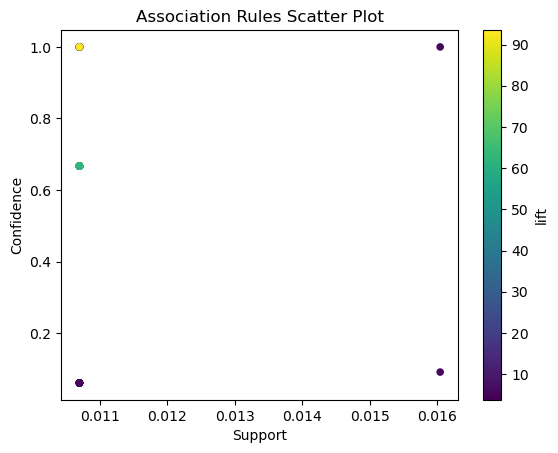

In [318]:

# Plotting the scatter plot
rules.plot.scatter(x='support', y='confidence', c='lift', colormap='viridis')

# Adding labels and title
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Scatter Plot')

# Display the plot
plt.show()


<Axes: xlabel='leverage', ylabel='confidence'>

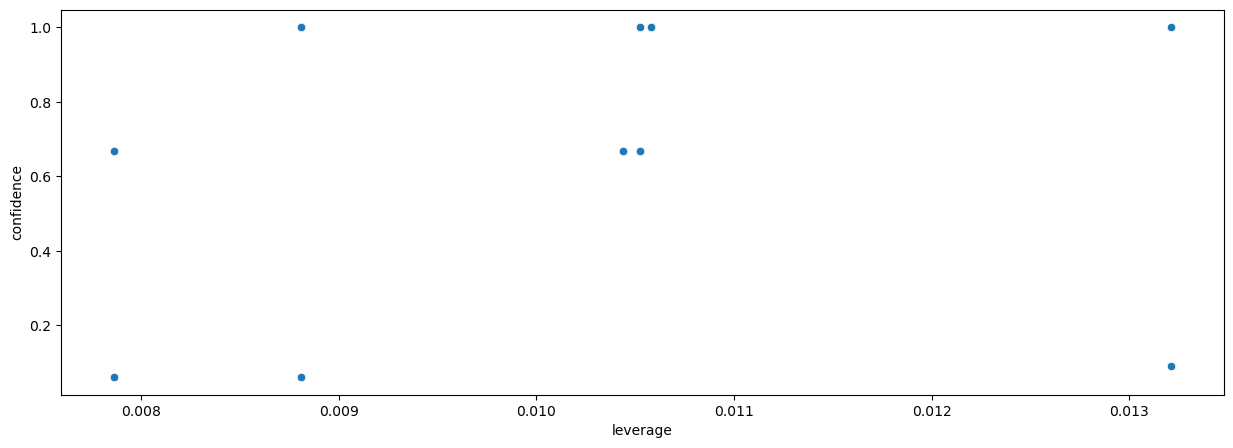

In [319]:
# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

In [320]:
# top ten association rules
top_ten_association_rules= rules.nlargest(10, "confidence")
top_ten_association_rules

antecedents                     consequents  \
94             (32078802, 32078935)            (32079082, 32078795)   
109            (32078795, 33700716)            (32078802, 32078935)   
111            (33700716, 32078935)            (32078802, 32078795)   
113                      (32078795)  (32078802, 33700716, 32078935)   
115                      (32078935)  (32078802, 32078795, 33700716)   
116  (32078802, 32078795, 33700716)                      (32079082)   
117  (32078802, 32078795, 32079082)                      (33700716)   
118  (32078802, 33700716, 32079082)                      (32078795)   
119  (32079082, 32078795, 33700716)                      (32078802)   
120            (32078802, 32078795)            (32079082, 33700716)   

     antecedent support  consequent support   support  confidence       lift  \
94             0.010695            0.010695  0.010695         1.0  93.500000   
109            0.010695            0.010695  0.010695         1.0  93.500000   
111            0.010695            0.010695  0.010695         1.0  93.500000   
113            0.010695            0.010695  0.010695         1.0  93.500000   
115            0.010695            0.010695  0.010695         1.0  93.500000   
116            0.010695            0.016043  0.010695         1.0  62.333333   
117            0.010695            0.176471  0.010695         1.0   5.666667   
118            0.010695            0.010695  0.010695         1.0  93.500000   
119            0.010695            0.016043  0.010695         1.0  62.333333   
120            0.010695            0.016043  0.010695         1.0  62.333333   

     leverage  conviction  zhangs_metric  
94   0.010581         inf       1.000000  
109  0.010581         inf       1.000000  
111  0.010581         inf       1.000000  
113  0.010581         inf       1.000000  
115  0.010581         inf       1.000000  
116  0.010524         inf       0.994595  
117  0.008808         inf       0.832432  
118  0.010581         inf       1.000000  
119  0.010524         inf       0.994595  
120  0.010524         inf       0.994595

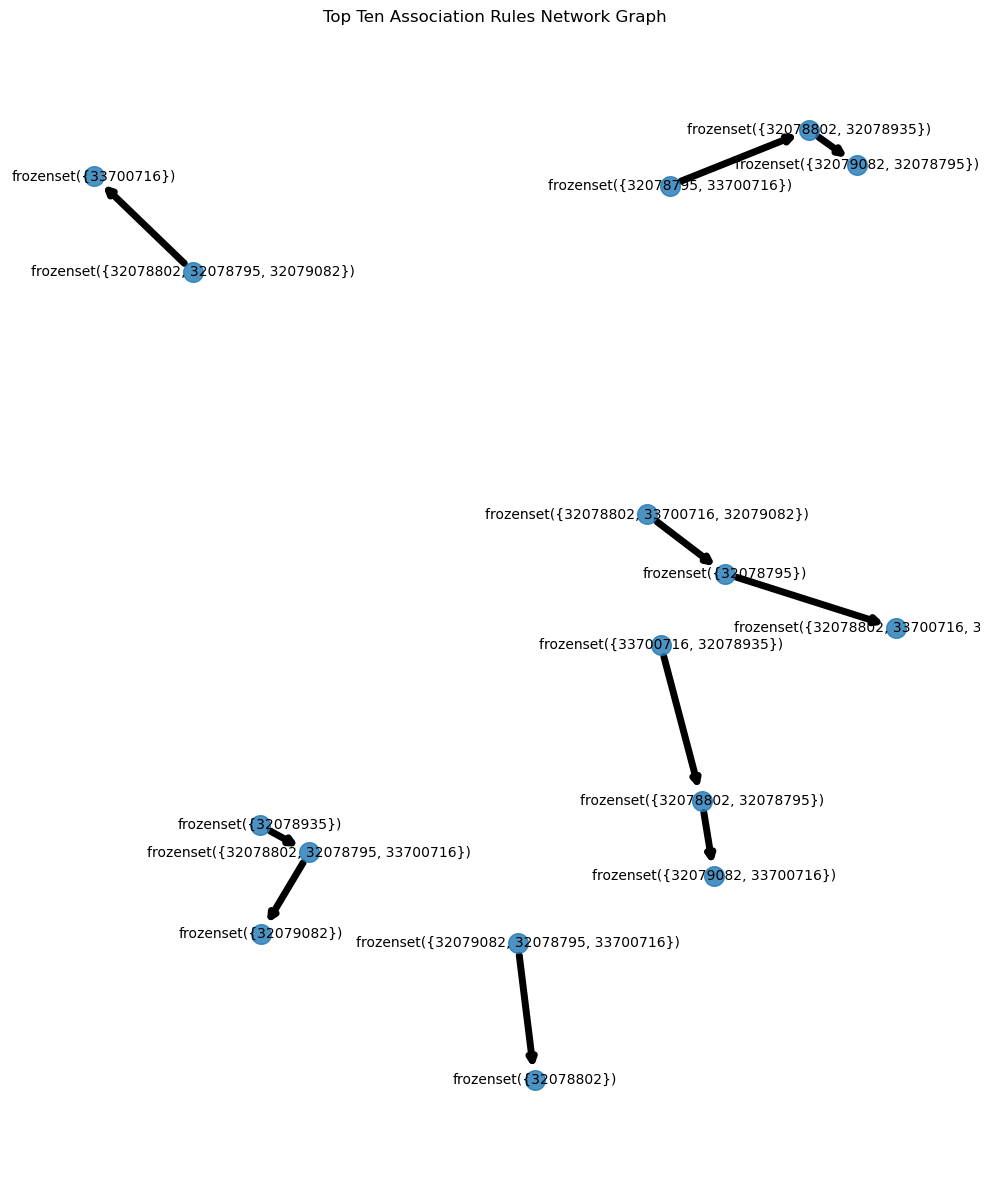

In [321]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for index, row in top_ten_association_rules.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']
    confidence = row['confidence']
    G.add_edge(antecedent, consequent, weight=confidence)

# Set positions for the nodes using the spring layout algorithm
pos = nx.spring_layout(G, seed=42)


# Customize the graph size
plt.figure(figsize=(10, 12))  # Adjust the width and height as desired

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=200, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=[d['weight'] * 5 for (u, v, d) in G.edges(data=True)])

# Add labels for nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Set plot title and show the graph
plt.title('Top Ten Association Rules Network Graph')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# heatmap of the association rules generated for 1% minimum support threshold.

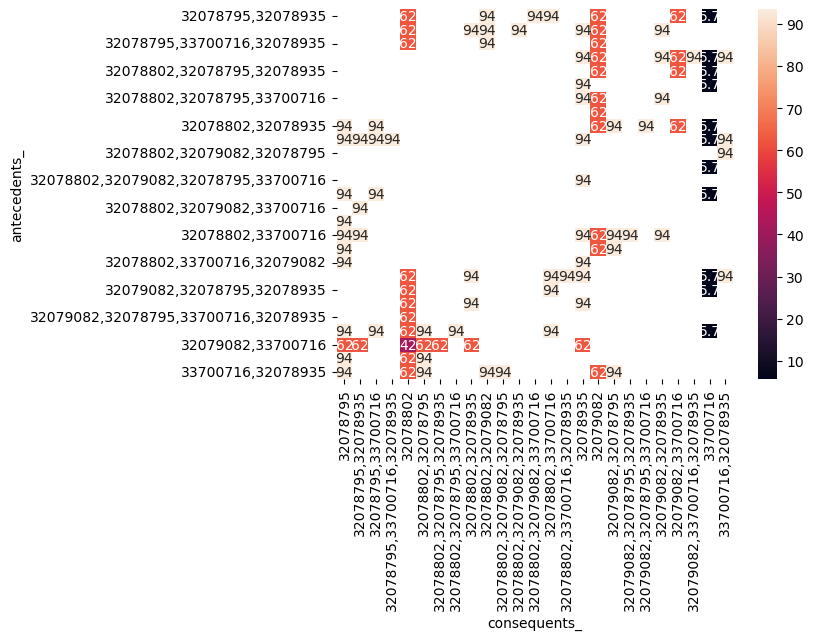

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

rules['lhs_items'] = rules['antecedents'].apply(lambda x: len(x))
rules = rules[rules['lhs_items'] > 1].sort_values('lift', ascending=False)

# Convert antecedents and consequents to strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(map(str, list(a))))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(map(str, list(a))))

pivot = rules.pivot(index='antecedents_', columns='consequents_', values='lift')
sns.heatmap(pivot, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


In [323]:
from PyARMViz import PyARMViz
from PyARMViz.Rule import generate_rule_from_dict
from packaging import version

# Replace instances of distutils Version with packaging.version
# For example, if you have a comparison like:
# if version_a > version_b:
# You can update it to:
# if version.parse(version_a) > version.parse(version_b):


apriori_vis = rules

apriori_vis['uni'] = False
apriori_vis['ant'] = False
apriori_vis['con'] = False
apriori_vis['tot'] = 20507

transactions = [a[1]['product_id'].tolist() for a in list(df.groupby(['order_id', 'purchase_datetime']))]

def tran():
    for t in transactions:
        yield t
def antec(x):
    cnt = 0
    for t in tran():
        t = set(t)
        if x.intersection(t) == x:
            cnt = cnt + 1
    return cnt
vis = apriori_vis.values.tolist()

rules_dict = []
for i in vis:
    i[10] = antec(i[0])
    i[11] = antec(i[1])
    i[9] = antec(i[0].union(i[1]))
    diction = {
        'lhs': tuple(i[0]), 
        'rhs': tuple(i[1]),
        'count_full': i[9],
        'count_lhs': i[10],
        'count_rhs': i[11],
        'num_transactions': i[12]
    }
    rules_dict.append(diction)

In [324]:
rules = []
for rd in rules_dict:
    rules.append(generate_rule_from_dict(rd))
    
PyARMViz.generate_parallel_category_plot(rules)

C:\Users\Admin\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Admin\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



C:\Users\Admin\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Admin\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



C:\Users\Admin\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Admin\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



C:\Users\Admin\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Admin\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [ ]:
///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
############################################## Core3 Sentiment Analysis:########################################################

In [333]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [326]:
dfRev = pd.read_csv('dfRev_uniques.csv')

In [327]:
dfRev.drop('Unnamed: 0', axis = 1, inplace = True)

In [328]:
dfRev.head()

review_text sentiment_label  \
0  best coffee from green mountain so far i recom...        positive   
1  My vet told me to have my dog get these to hel...        positive   
2  i have not gotten my order or heard anything f...        negative   
3  No bitter aftertaste no stomach burning after ...        positive   
4  I have purchase this coffee several times my h...        positive   

   review_id  customer_id  
0      16434         7821  
1      21485       246969  
2     104035       298715  
3     115260       406505  
4       9418       693062

In [329]:
dfRev.shape

(57, 4)

In [330]:
dfRev.columns

Index(['review_text', 'sentiment_label', 'review_id', 'customer_id'], dtype='object')

In [334]:
dfRev['sentiment_label'].value_counts()

# 44 positive reviews
# 9 neutral reviews
# 4 Negative reviews

positive    44
neutral      9
negative     4
Name: sentiment_label, dtype: int64

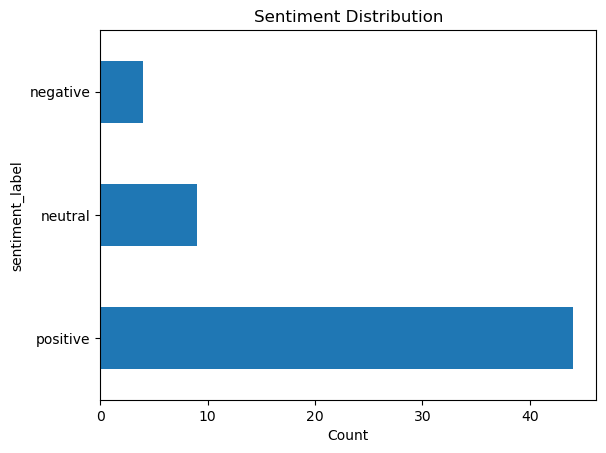

In [335]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the `sentiment` column
sentiment_counts = dfRev['sentiment_label'].value_counts()

# Create a bar plot using pandas
sentiment_counts.plot(kind='barh')

# Set the plot title and axis labels
plt.title('Sentiment Distribution')
plt.ylabel('sentiment_label')
plt.xlabel('Count')

# Display the plot
plt.show()

<Axes: ylabel='sentiment_label'>

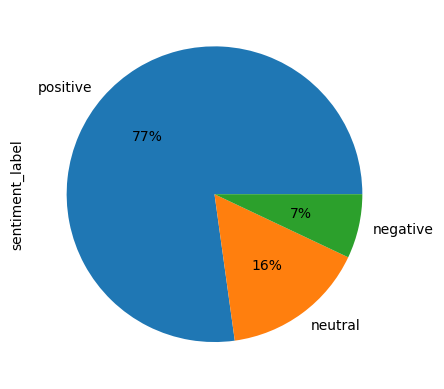

In [336]:
dfRev['sentiment_label'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

In [337]:
# NA data
dfRev.isnull().sum()

review_text        0
sentiment_label    0
review_id          0
customer_id        0
dtype: int64

In [ ]:
# aggregate ainput and output dataset 

In [338]:
x = dfRev['review_text']      # input dataset
y = dfRev['sentiment_label']  # output dataset

In [ ]:
#  Data Cleaning

In [ ]:
### Create a function to clean the data

In [339]:
import string

In [340]:
punct = string.punctuation

In [341]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [342]:
from spacy.lang.en.stop_words import STOP_WORDS

In [343]:
stopwords = list(STOP_WORDS) # list of stopwords

In [344]:
stopwords

['beforehand',
 "'d",
 'hereupon',
 'give',
 'can',
 'being',
 'seems',
 'amount',
 'next',
 'whither',
 'put',
 'latterly',
 'at',
 'before',
 'unless',
 'myself',
 'into',
 'my',
 'within',
 'each',
 'over',
 'until',
 'never',
 'meanwhile',
 'done',
 'else',
 'whereby',
 '‘ll',
 'from',
 'n’t',
 'where',
 'an',
 'all',
 'ever',
 'also',
 'herein',
 'against',
 'we',
 'many',
 'since',
 '’ve',
 'during',
 'move',
 'ca',
 'made',
 'serious',
 'a',
 'various',
 'via',
 'when',
 '‘re',
 'yourself',
 'whom',
 'will',
 'is',
 "'m",
 'so',
 'nothing',
 'under',
 '‘s',
 'whatever',
 'more',
 'out',
 'yourselves',
 'thence',
 'go',
 'would',
 'thru',
 'they',
 'have',
 "'s",
 'wherein',
 'whence',
 'amongst',
 'less',
 'back',
 'own',
 'himself',
 'eight',
 'such',
 'seemed',
 'hereby',
 'below',
 'might',
 'whereupon',
 'was',
 'using',
 'once',
 'around',
 'several',
 'what',
 'due',
 'too',
 'front',
 'seeming',
 'whoever',
 'though',
 'beside',
 'noone',
 'same',
 'without',
 'down',
 'a

In [ ]:
# creating a function for data cleaning

In [345]:
def text_data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = [] # list of tokens
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [346]:
# Apply text_data_cleaning function on the 'review_text' column

dfRev['text_data_cleaning'] = dfRev['review_text'].apply(text_data_cleaning)

In [347]:
dfRev.head()

review_text sentiment_label  \
0  best coffee from green mountain so far i recom...        positive   
1  My vet told me to have my dog get these to hel...        positive   
2  i have not gotten my order or heard anything f...        negative   
3  No bitter aftertaste no stomach burning after ...        positive   
4  I have purchase this coffee several times my h...        positive   

   review_id  customer_id                                 text_data_cleaning  
0      16434         7821  [good, coffee, green, mountain, far, recomend,...  
1      21485       246969                [vet, tell, dog, help, tooth, love]  
2     104035       298715              [order, hear, seller, send, 2, email]  
3     115260       406505  [bitter, aftertaste, stomach, burn, drink, gre...  
4       9418       693062  [purchase, coffee, time, husband, great, taste...

In [348]:
dfRev['review_text'][2]

'i have not gotten my order or heard anything from the seller even after sending out 2 emails'

In [ ]:
### Vectorization Feature Engineering (TF-IDF)

In [349]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [350]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)
# tokenizer=text_data_cleaning, tokenization will be done according to this function

In [351]:
classifier = LinearSVC()

In [352]:
#Train the model
#Splitting the dataset into the Train and Test set

In [353]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [354]:
x_train.shape, x_test.shape
# 2198 samples in training dataset and 550 in test dataset

((45,), (12,))

In [355]:
x_train.head()

29    We love this Stevia as it is one of the only o...
50    I was looking for a smooth robust coffee and I...
32    I bought this item for a christmas gift for my...
40    it is great to have sugar free koolaid availab...
37    i love tazo teas i dont really like friuty one...
Name: review_text, dtype: object

In [ ]:
### Fit the x_train and y_train

In [356]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
# it will first do vectorization and then it will do classification

In [357]:
clf.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x00000286BA08E710>)),
                ('clf', LinearSVC())])

In [ ]:
# in this we don't need to prepare the dataset for testing(x_test)

In [ ]:
### Predict the Test set results

In [358]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [359]:
y_pred = clf.predict(x_test)

In [360]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 1],
       [0, 0, 3],
       [0, 0, 7]], dtype=int64)

In [361]:
# classification_report
print(classification_report(y_test, y_pred))
# we are getting almost 67% accuracy

              precision    recall  f1-score   support

    negative       1.00      0.50      0.67         2
     neutral       0.00      0.00      0.00         3
    positive       0.64      1.00      0.78         7

    accuracy                           0.67        12
   macro avg       0.55      0.50      0.48        12
weighted avg       0.54      0.67      0.56        12



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [362]:
accuracy_score(y_test, y_pred)
# 67% accuracy

0.6666666666666666

In [363]:
clf.predict(["this coffee has a very funny taste to it not good you would think wolfgang it would be good dont buy this coffee this is a review of 6 people there are 6 people in my shop we all hate it not good"])
# output is negative, that means review is positive

array(['negative'], dtype=object)

In [365]:
clf.predict(["i have not gotten my order or heard anything from the seller even after sending out 2 emails"])
# output is positive, that means review is Negative

array(['positive'], dtype=object)

In [ ]:
# this coffee has a very funny taste to it not good you would think wolfgang it would be good dont buy this coffee this is a review of 6 people there are 6 people in my shop we all hate it not good

In [366]:
# i have not gotten my order or heard anything from the seller even after sending out 2 emails

In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
############################################## Extra1 BERT MOdel:###############################################################

In [54]:
dfRev = pd.read_csv('dfRev_uniques.csv')
dfRev.drop('Unnamed: 0', axis = 1, inplace = True)
dfRev.head()

review_text sentiment_label  \
0  best coffee from green mountain so far i recom...        positive   
1  My vet told me to have my dog get these to hel...        positive   
2  i have not gotten my order or heard anything f...        negative   
3  No bitter aftertaste no stomach burning after ...        positive   
4  I have purchase this coffee several times my h...        positive   

   review_id  customer_id  
0      16434         7821  
1      21485       246969  
2     104035       298715  
3     115260       406505  
4       9418       693062

In [55]:
!pip install tensorflow
!pip install tensorflow-text
!pip install transformers


In [58]:
import pandas as pd
import tensorflow as tf
import tensorflow_text as text
from transformers import BertTokenizer, TFBertModel

In [59]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')


C:\Users\Admin\anaconda3\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)
C:\Users\Admin\anaconda3\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)
C:\Users\Admin\anaconda3\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)
C:\Users\Admin\anaconda3\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)
C:\Users\Admin\anaconda3\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3

In [61]:
# Tokenize the text and convert it into input tensors
encoded_inputs = tokenizer(dfRev['review_text'].tolist(), padding=True, truncation=True, return_tensors='tf')

# Get the input IDs, attention masks, and token type IDs
input_ids = encoded_inputs['input_ids']
attention_mask = encoded_inputs['attention_mask']
token_type_ids = encoded_inputs['token_type_ids']


In [62]:
# Generate the BERT embeddings
outputs = model([input_ids, attention_mask, token_type_ids])
bert_embeddings = outputs[0]


In [63]:
# Create a new column in the DataFrame for the BERT embeddings
dfRev['bert_embeddings'] = bert_embeddings.numpy().tolist()


In [64]:
dfRev.head()

review_text sentiment_label  \
0  best coffee from green mountain so far i recom...        positive   
1  My vet told me to have my dog get these to hel...        positive   
2  i have not gotten my order or heard anything f...        negative   
3  No bitter aftertaste no stomach burning after ...        positive   
4  I have purchase this coffee several times my h...        positive   

   review_id  customer_id                                    bert_embeddings  
0      16434         7821  [[-0.26857632398605347, -0.07677245140075684, ...  
1      21485       246969  [[-0.15260227024555206, 0.37050384283065796, 0...  
2     104035       298715  [[0.05873159319162369, -0.0011943671852350235,...  
3     115260       406505  [[-0.17162472009658813, -0.03412655368447304, ...  
4       9418       693062  [[0.1262083649635315, 0.17362676560878754, 0.1...

In [45]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Prepare the data
def get_bert_embeddings(text):
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs[0][:, 0, :].squeeze().numpy()  # Extract embeddings from the [CLS] token
    return embeddings

dfRev['bert_embeddings'] = dfRev['review_text'].apply(get_bert_embeddings)

# Flatten the BERT embeddings
X = np.vstack(dfRev['bert_embeddings'])
y = dfRev['sentiment_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set and evaluate the model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Accuracy: 0.8333333333333334
